In [233]:
import json
import numpy as np
from collections import defaultdict, Counter
import string
from sklearn import linear_model
import sys
import nltk
import random
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt
import matplotlib

In [147]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/mhy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [148]:
import spacy

In [149]:
f_name = "Software.json"
all_data = []
with open(f_name, 'r') as f:
    line = f.readline()
    #print(line)
    while line:
        data = json.loads(line)
        all_data.append(data)
        line = f.readline()

In [150]:
print(all_data[0])
print(len(all_data))

{'overall': 4.0, 'verified': True, 'reviewTime': '03 11, 2014', 'reviewerID': 'A240ORQ2LF9LUI', 'asin': '0077613252', 'style': {'Format:': ' Loose Leaf'}, 'reviewerName': 'Michelle W', 'reviewText': "The materials arrived early and were in excellent condition.  However for the money spent they really should've come with a binder and not just loose leaf.", 'summary': 'Material Great', 'unixReviewTime': 1394496000}
459436


In [151]:
for i in all_data:
    if 'reviewText' not in i.keys() or 'overall' not in i.keys() or not i['reviewText'] or not i['overall']:
        all_data.remove(i)

In [154]:
all_data = random.choices(all_data, k=60000)
print(len(all_data))

60000


In [155]:
def only_adj_and_noun(all_data):
    bigramCount = defaultdict(int)
    uniCount = defaultdict(int)
    punctuation = set(string.punctuation)
    stop_words = set(stopwords.words('english'))
    translator = str.maketrans('', '', string.punctuation)
    nlp = spacy.load("en_core_web_sm")

    review_text = []
    for idx, d in enumerate(all_data):
        if idx % 1000 == 0:
            print(idx)
        #r = ''.join([c for c in d['reviewText'].lower() if not c in discard_set])
        r = d['reviewText'].translate(translator).lower()
        doc = nlp(r)
        r = [word.text for word in doc if word.text not in stop_words and not word.text.isdigit() and 
             word.pos_ in ("NOUN", "ADJ")]
        review_text.append(" ".join(r))
        if r:
            prev = r[0]
            for i in range(1, len(r)):
                bigram = prev + " " + r[i]
                uniCount[r[i]] += 1
                bigramCount[bigram] += 1
                prev = r[i]
            uniCount[r[0]] += 1
    return uniCount, bigramCount, review_text

In [156]:
uni_count, bi_count, review_text = only_adj_and_noun(all_data)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000


In [159]:
print(len(bi_count), len(uni_count))

646110 44527


In [160]:
def feature(text, bigrams, bigramId):
    feat = [0]*len(bigrams)
    words = text.split()
    for i in range(len(words)-1):
        bigram = words[i] + " " + words[i+1]
        try:
            feat[bigramId[bigram]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [161]:
countsBigram = [(bi_count[d], d) for d in bi_count.keys()]
countsBigram.sort()
countsBigram.reverse()

In [162]:
bigrams = [c[1] for c in countsBigram[:1000]]
bigramId = dict(zip(bigrams, range(len(bigrams))))
bigramSet = set(bigrams)

In [163]:
print(review_text[1])

terrible trial selection tool work window problem many times compatibility test options money middle big project problem


In [164]:
X_2 = []
for i in range(len(all_data)):
    X_2.append(feature(review_text[i], bigrams, bigramId))
y_2 = [d['overall'] for d in all_data]

In [165]:
reg = 1.0
clf_bi = linear_model.Ridge(reg, fit_intercept=False)
clf_bi.fit(X_2, y_2)
theta_bi = clf_bi.coef_
pred_bi = clf_bi.predict(X_2)

In [268]:
max_index = np.argsort(theta_bi)[-300:][::-1]
max_index = max_index[1:]
#print(max_index)
#print(theta_bi[max_index])
#print(np.array(bigrams)[max_index - 1])
tmp_bigram = np.array(bigrams)[max_index]
tmp_pair = {bigrams[i]: theta_bi[i] for i in max_index}

#print(tmp_pair["bad product"])
print(tmp_bigram)

['great app' 'taxes easy' 'pleased purchase' 'excellent product'
 'pleased product' 'excellent software' 'fast delivery' 'best product'
 'easy download' 'bit time' 'best antivirus' 'excellent program'
 'fast easy' 'great software' 'time saver' 'great product' 'timely manner'
 'great service' 'lot easier' 'fast shipping' 'great tool' 'great buy'
 'good work' 'great help' 'life easier' 'worth penny' 'good price'
 'best price' 'easy problems' 'problems installation' 'great value'
 'great price' 'easy use' 'quick easy' 'easy install' 'best program'
 'product excellent' 'good buy' 'years easy' 'easy easy' 'everything easy'
 'reasonable price' 'easy great' 'happy purchase' 'great easy'
 'second year' 'best thing' 'tax time' 'great job' 'windows easy'
 'best part' 'works great' 'great game' 'less minutes' 'program easy'
 'time great' 'great program' 'easy computer' 'years best' 'easy user'
 'good value' 'lot fun' 'great feature' 'time easy' 'easy installation'
 'nice feature' 'best version' '

In [297]:
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['figure.dpi'] = 400
matplotlib.rcParams['axes.labelcolor'] = 'k'
matplotlib.rcParams['axes.edgecolor'] = 'k'
matplotlib.rcParams['xtick.color'] = 'k'
matplotlib.rcParams['ytick.color'] = 'k'
matplotlib.rcParams['axes.labelsize'] = 'large'

['great app', 'fast delivery', 'best antivirus', 'worth penny', 'windows programs']


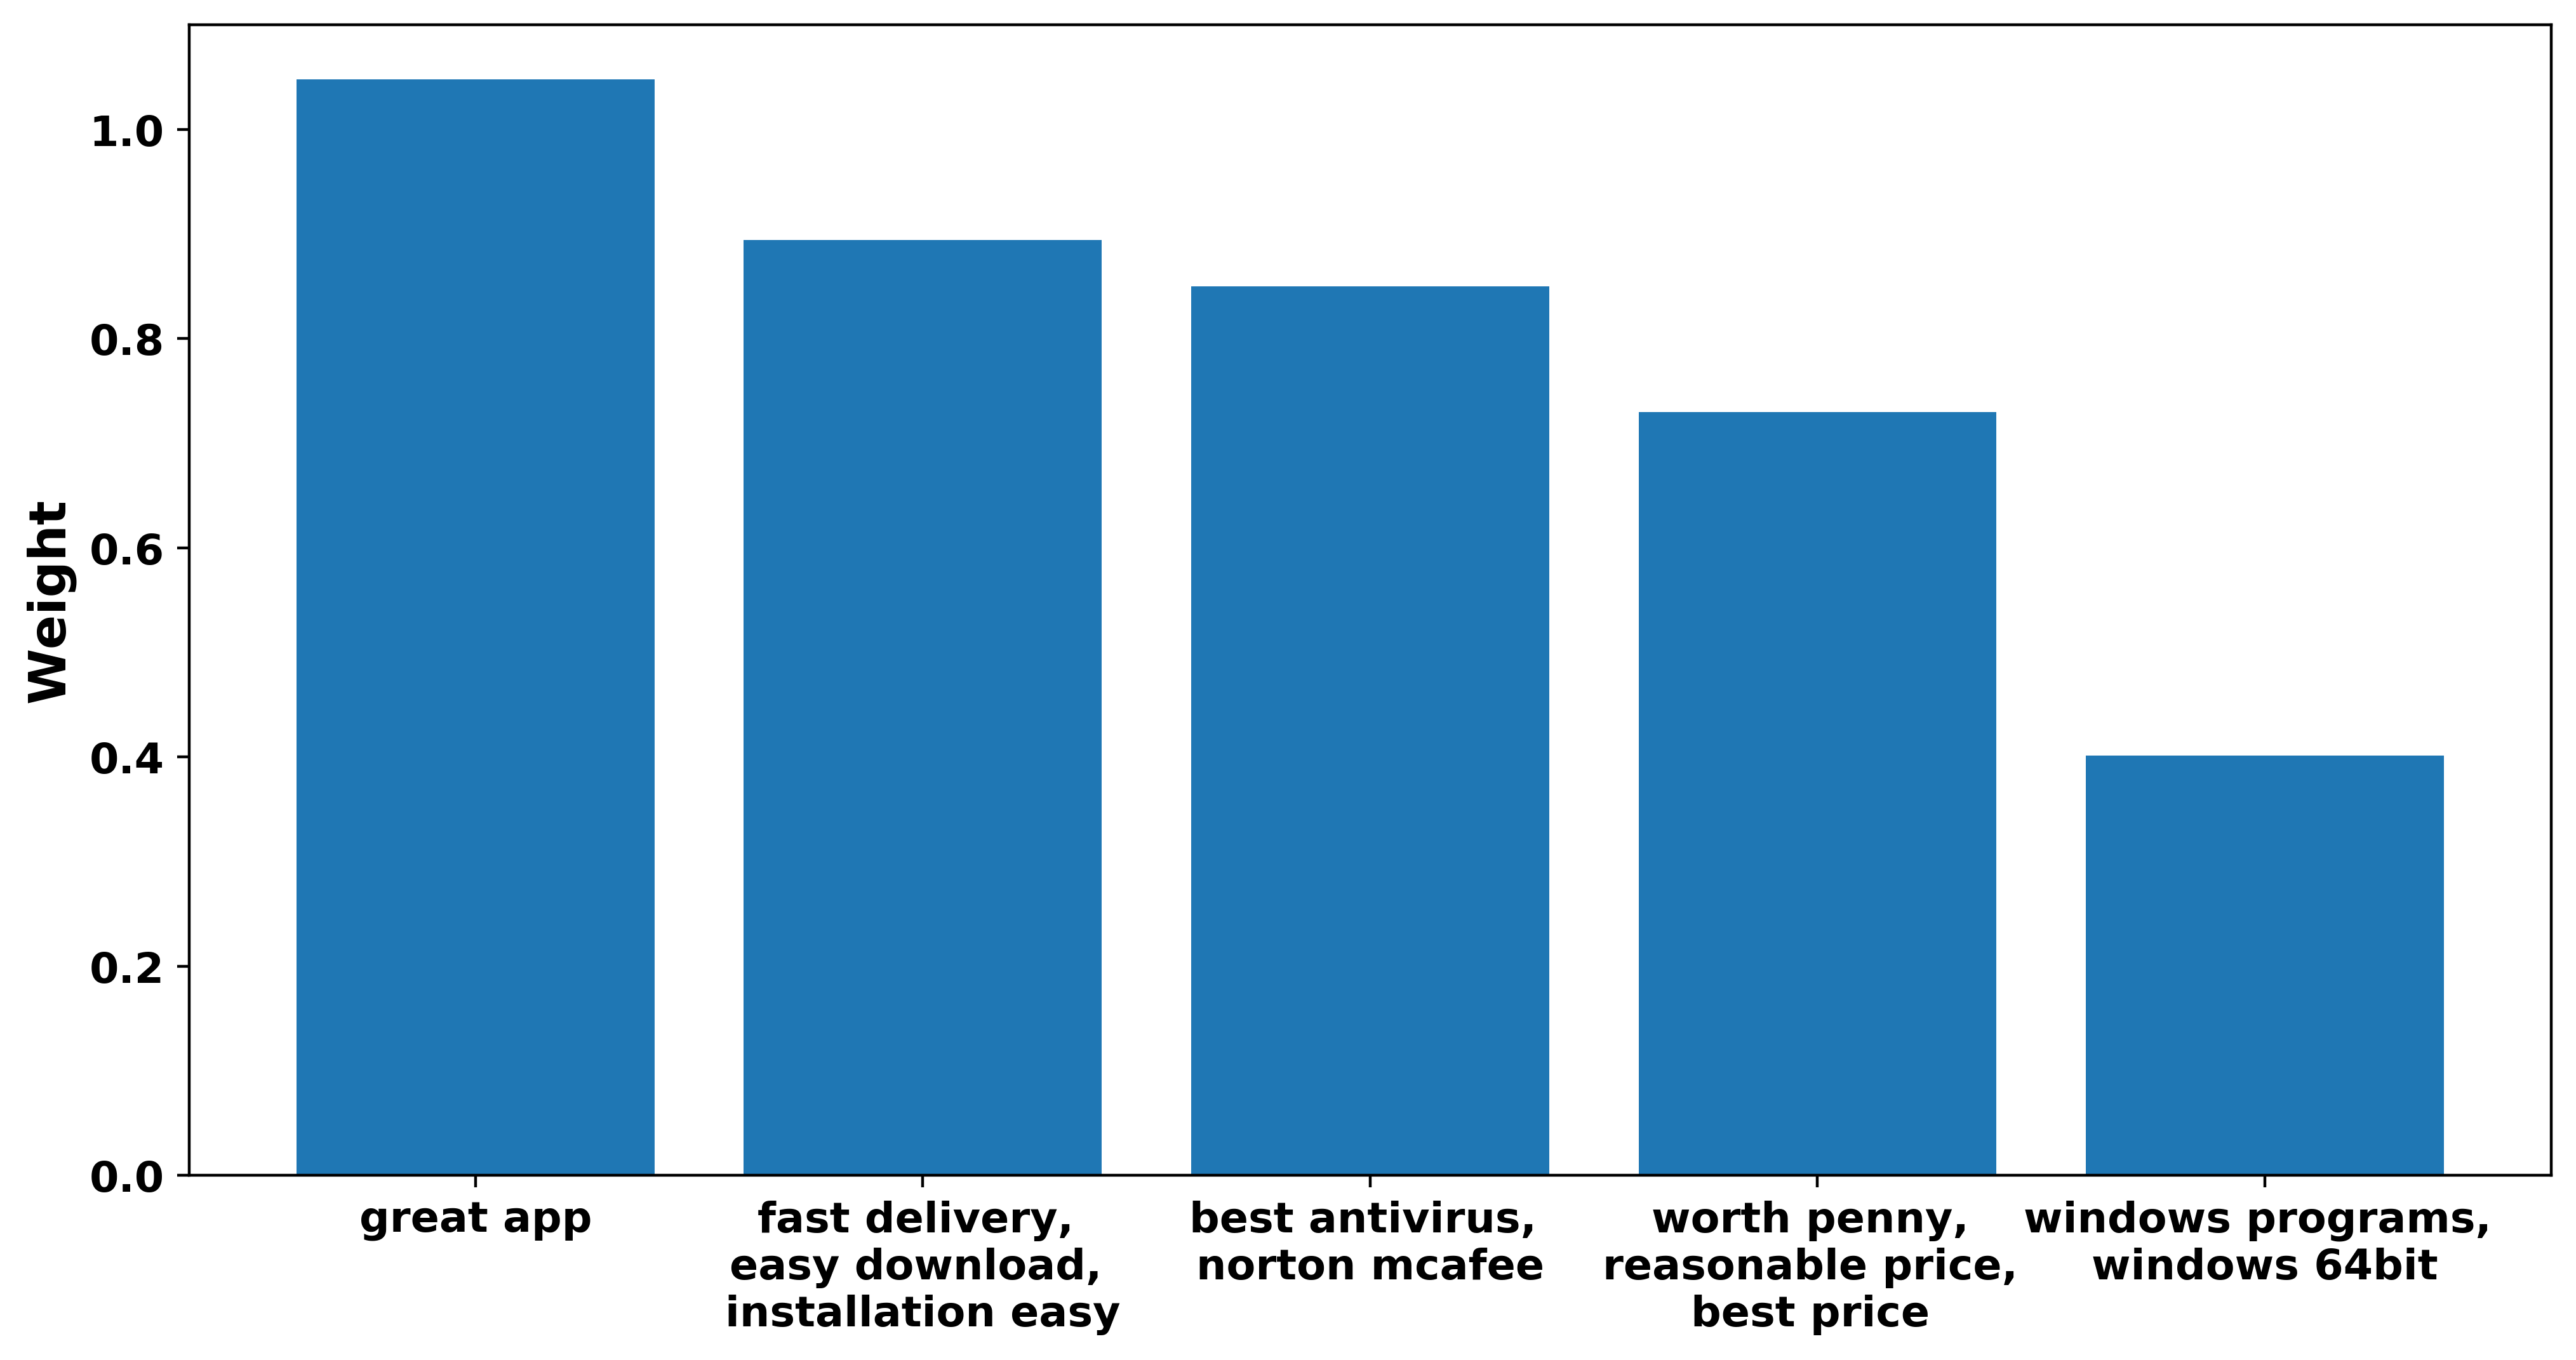

In [303]:
selected_list = ['great app', 'fast delivery', 'best antivirus', 'worth penny', 'windows programs']
ticks = ['great app', 'fast delivery, \neasy download, \ninstallation easy', 'best antivirus, \nnorton mcafee','worth penny, \nreasonable price, \nbest price ' , 'windows programs, \nwindows 64bit']
ticks_dic = {i:ticks[idx] for idx, i in enumerate(selected_list)}
selected_list.sort(key=lambda x: abs(tmp_pair[x]), reverse=True)
print(selected_list)
coef = [abs(tmp_pair[i]) for i in selected_list]
fig = plt.figure(figsize=(12, 6))
x=np.array([])
y=np.array([])
#fig.patch.set_alpha(0);
#ax = fig.add_subplot(111)
#ax.patch.set_alpha(0);
plt.bar([ticks_dic[i] for i in selected_list], coef)
#plt.title('Top 10 important words for analysis and recommendation', color="white")
plt.ylabel('Weight',weight = 'bold')
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.show()

#######################

In [167]:
countsUnigram = [(uni_count[w], w) for w in uni_count]
countsUnigram.sort()
countsUnigram.reverse()

In [168]:
unigrams = [x[1] for x in countsUnigram[:1000]]
unigramId = dict(zip(unigrams, range(len(unigrams))))
unigramSet = set(unigrams)

In [169]:
def feature_2(text, unigrams, unigramId):
    feat = [0]*len(unigrams)
    words = text.split()
    for i in words:
        #bigram = words[i] + " " + words[i+1]
        try:
            feat[unigramId[i]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [170]:
def feature_3(text):
    feat = [0]*len(combineds)
    words = text.split()
    for i in range(len(words)-1):
        bigram = words[i] + " " + words[i+1]
        try:
            feat[combinedId[bigram]] += 1
        except KeyError:
            continue
    for w in words:
        try:
            feat[combinedId[w]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [171]:
X_uni = []
for i in range(len(all_data)):
    X_uni.append(feature_2(review_text[i], unigrams, unigramId))
y_uni = [d['overall'] for d in all_data]

In [172]:
print(len(X_uni), len(y_uni))

60000 60000


In [173]:
reg = 1.0
clf_uni = linear_model.Ridge()
clf_uni.fit(X_uni, y_uni)
theta_uni = clf_uni.coef_
pred_uni = clf_uni.predict(X_uni)

In [174]:
max_index = np.argsort(theta_uni)[-200:][::-1]
print(len(theta_uni[max_index]))
#print(np.array(bigrams)[max_index - 1])
tmp_uni = np.array(unigrams)[max_index - 1]
print(tmp_uni)
count_pair = [(i, uni_count[i]) for i in tmp_uni]
print(count_pair)

200
['ease' 'bad' 'range' 'star' 'voice' 'computer' 'payroll' 'true'
 'ridiculous' 'project' 'huge' 'willing' 'new' 'default' 'office'
 'powerpoint' 'filing' 'normal' 'flash' 'cost' 'potential' 'front'
 'helpful' 'numerous' 'designer' 'reading' 'driver' 'disappointing' 'cd'
 'kindle' 'sense' 'characters' 'charge' 'recovery' 'paint' 'option'
 'familiar' 'images' 'fault' 'seller' 'store' 'backups' 'videos' 'content'
 'password' 'test' 'trial' 'crap' 'calendar' 'improvement' 'cable' 'parts'
 'joke' 'impossible' 'cpu' 'bonus' 'digital' 'sound' 'sync' 'music'
 'roxio' 'browser' 'years' 'math' 'cds' 'house' 'difference' 'age'
 'effort' 'interface' 'dos' 'section' 'services' 'areas' 'navigation'
 'message' 'language' 'great' 'art' 'tracks' 'rebate' 'chat' 'room'
 'commands' 'knowledge' 'hr' 'solutions' 'run' 'keys' 'irs' 'list'
 'stable' 'raw' 'sony' 'points' 'control' 'disappointment' 'longer'
 'laptops' 'box' 'websites' 'terrible' 'total' 'tree' 'purpose' 'items'
 'tab' 'limited' 'load' 'ha

##### get low ratting data ####

In [136]:
########################################
#   not using for now                  #
########################################

# def get_bigrams(all_data, count):
#     bigramCount = defaultdict(int)
#     punctuation = set(string.punctuation)
#     for d in all_data:
#         r = ''.join([c for c in d['reviewText'].lower() if not c in punctuation])
#         words = r.split()
#         for i in range(0,len(words)-1):
#             bigram = words[i] + " " + words[i+1]
#             bigramCount[bigram] += 1
#     countsBigram = [(bigramCount[d], d) for d in bigramCount.keys()]
#     countsBigram.sort()
#     countsBigram.reverse()
#     bigrams = [c[1] for c in countsBigram[:count]]
#     bigramId = dict(zip(bigrams, range(len(bigrams))))
#     bigramSet = set(bigrams)
#     return bigramId, bigramSet, countsBigram

# def get_unigrams(all_data, count):
#     unigramCount = defaultdict(int)
#     for d in all_data:
#         r = ''.join([c for c in d['reviewText'].lower() if not c in punctuation])
#         for w in r.split():
#             unigramCount[w] += 1
#     countsUnigram = [(unigramCount[w], w) for w in unigramCount]
#     countsUnigram.sort()
#     countsUnigram.reverse()
#     unigrams = [x[1] for x in countsUnigram[:count]]
#     unigramId = dict(zip(unigrams, range(len(unigrams))))
#     unigramSet = set(unigrams)
#     return unigramId, unigramSet, countsUnigram

# def get_training_data(all_data, review_text):
#     X = []
#     for i in range(len(all_data)):
#         X.append(feature_3(review_text[i]))
#     y = [d['overall'] for d in all_data]
#     return X, y

In [175]:
def data_by_rating(all_data, rating):
    ratings_data = []
    for d in all_data:
        if d['overall'] == rating:
            ratings_data.append(d)
    #print(len(ratings_data))
    return ratings_data

low_ratings = data_by_rating(all_data, 1.0)
#reviewText_low = [''.join([c for c in datum['reviewText'].lower() if not c in punctuation]) for datum in low_ratings]

In [176]:
low_uni_count, low_bi_count, low_reviews = only_adj_and_noun(low_ratings)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000


In [177]:
low_uni_count, low_bi_count = Counter(low_uni_count), Counter(low_bi_count)

In [178]:
print(low_uni_count.most_common(50))

[('software', 7267), ('product', 6233), ('program', 4780), ('version', 4333), ('computer', 3897), ('time', 3855), ('support', 3541), ('windows', 3498), ('money', 2739), ('new', 2663), ('years', 2373), ('quicken', 2324), ('problem', 2094), ('year', 1704), ('customer', 1701), ('system', 1617), ('many', 1610), ('good', 1601), ('way', 1523), ('mac', 1508), ('amazon', 1481), ('microsoft', 1457), ('problems', 1447), ('hours', 1361), ('tax', 1356), ('intuit', 1338), ('service', 1323), ('user', 1253), ('company', 1234), ('pc', 1223), ('free', 1185), ('tech', 1171), ('old', 1135), ('norton', 1098), ('nothing', 1096), ('able', 1087), ('file', 1079), ('refund', 1059), ('data', 1051), ('turbotax', 1039), ('files', 1023), ('help', 979), ('times', 960), ('error', 958), ('email', 941), ('first', 932), ('last', 918), ('something', 915), ('days', 915), ('business', 906)]


In [179]:
print(low_bi_count.most_common(50))

[('tech support', 862), ('customer service', 711), ('turbo tax', 479), ('customer support', 432), ('waste money', 374), ('hard drive', 325), ('credit card', 279), ('new version', 276), ('technical support', 251), ('product key', 244), ('operating system', 240), ('new computer', 234), ('last year', 234), ('error message', 210), ('time money', 200), ('many years', 199), ('internet security', 199), ('first time', 197), ('rosetta stone', 190), ('waste time', 186), ('long time', 170), ('web site', 166), ('last years', 164), ('user friendly', 162), ('next year', 159), ('windows windows', 156), ('several times', 156), ('serial number', 155), ('older version', 139), ('brand new', 138), ('previous version', 138), ('piece software', 131), ('version quicken', 130), ('bottom line', 128), ('old version', 128), ('software software', 127), ('software computer', 126), ('previous versions', 121), ('trial version', 120), ('tax software', 119), ('user interface', 115), ('version windows', 114), ('phone n

['great app', 'fast delivery', 'best antivirus', 'worth penny', 'office software']


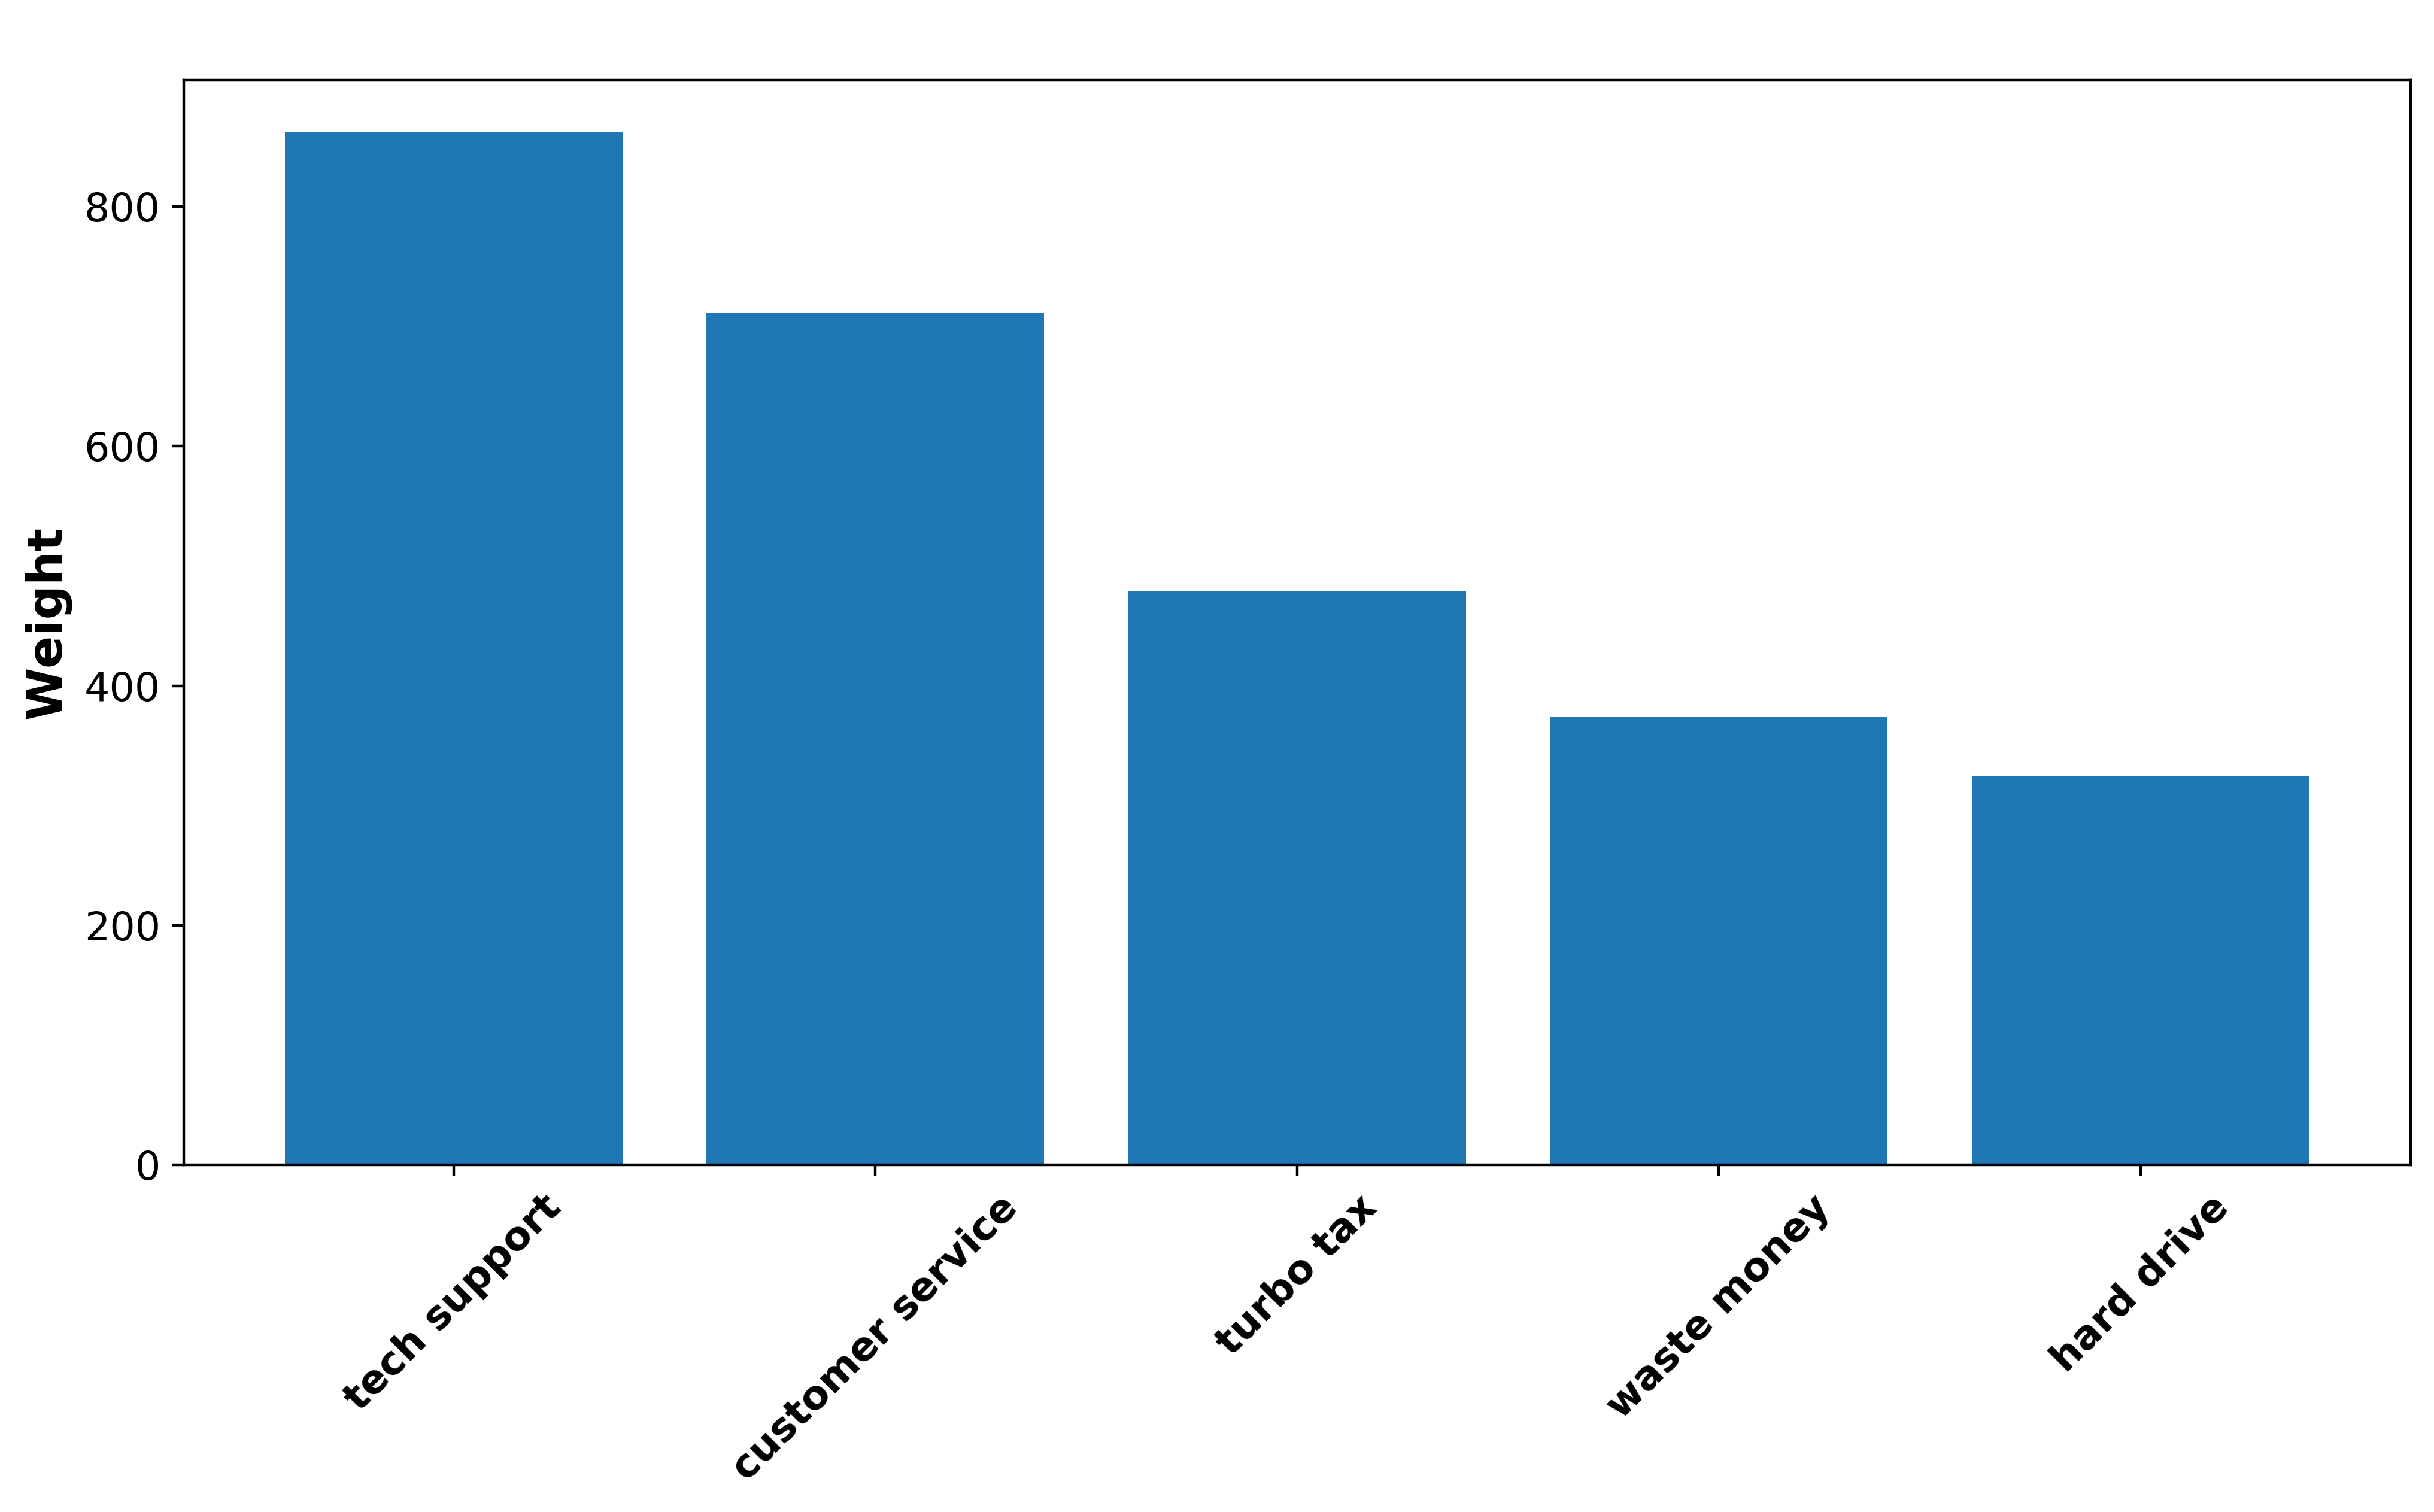

In [301]:
low_selected = ['tech support','turbo tax', 'customer service', 'hard drive', 'waste money']
#low_pair = 
low_selected.sort(key=lambda x: low_bi_count[x], reverse=True)
print(selected_list)
coef = [low_bi_count[i] for i in low_selected]
fig = plt.figure(figsize=(12, 6))
x=np.array([])
y=np.array([])
#fig.patch.set_alpha(0);
ax = fig.add_subplot(111)
#ax.patch.set_alpha(0);
plt.bar(low_selected,coef)
plt.title('Top 5 most important words for low rating', color="white", weight='bold')
plt.ylabel('Weight', weight="bold")
plt.xticks(rotation=45, weight="bold")
plt.show()

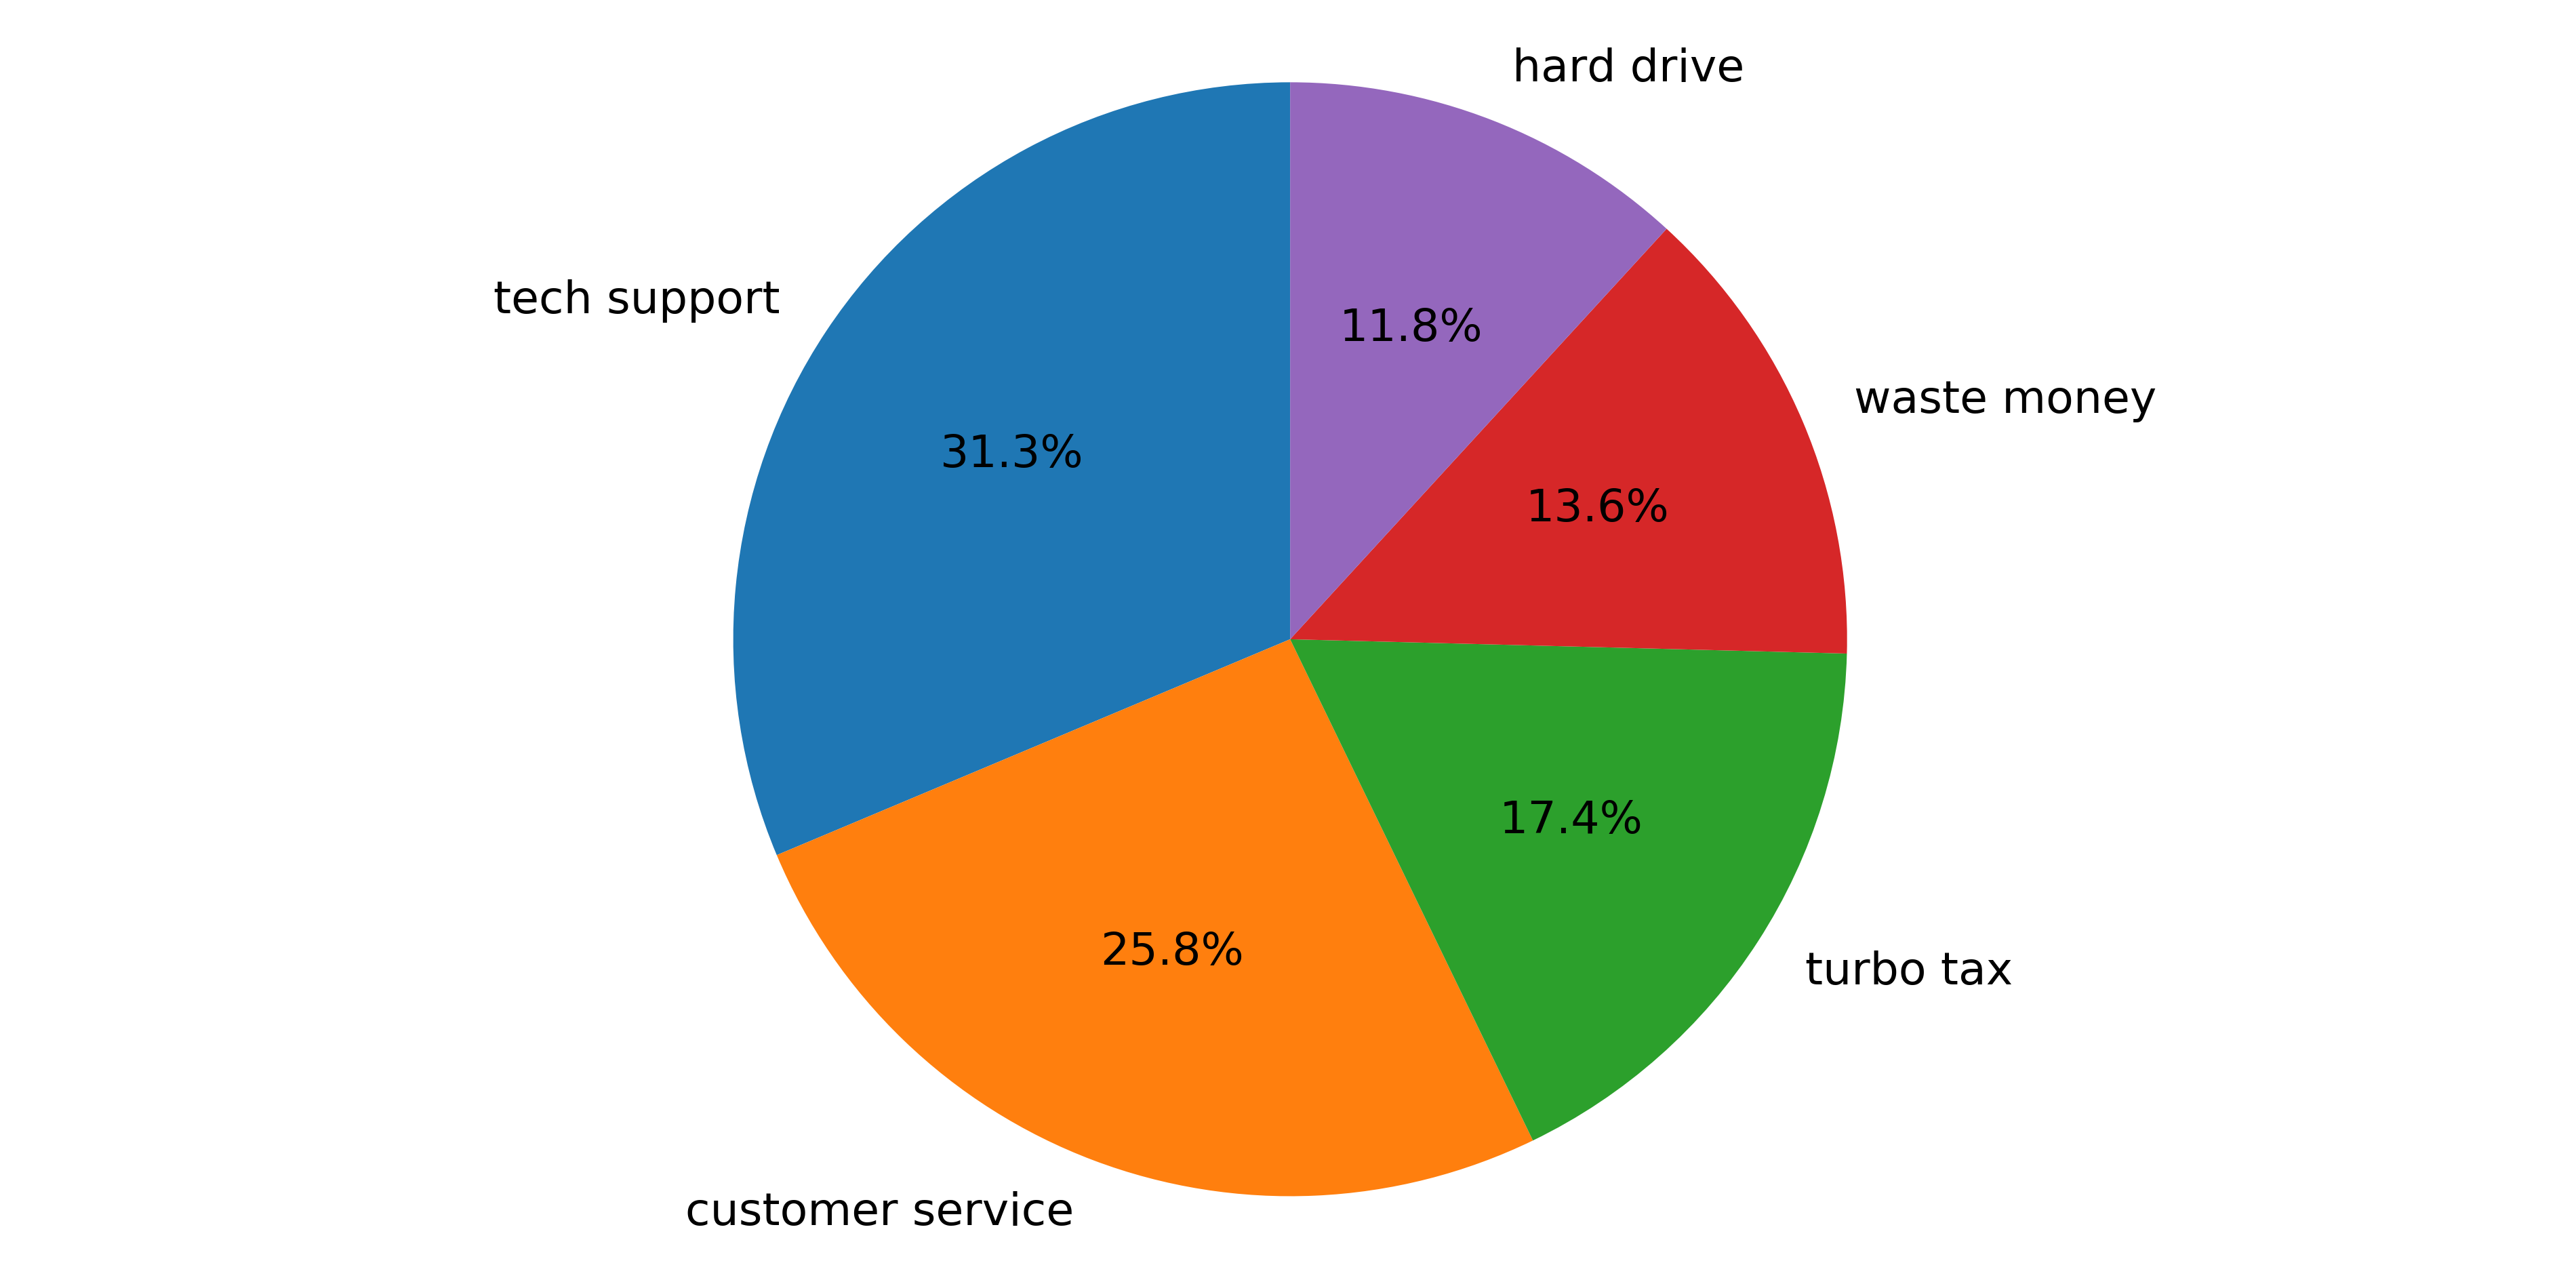

In [302]:
matplotlib.rcParams['text.color'] = 'k'
fig1 = plt.figure(figsize=(12, 6))
#fig1, ax1 = plt.subplots()
#fig1.patch.set_alpha(0);
ax1 = fig1.add_subplot(111)
#ax1.patch.set_alpha(0);
wedges ,texts, _ = ax1.pie(coef, labels=low_selected, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color("k")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [181]:
print(high_uni_count.most_common(50))

[('software', 7767), ('great', 7300), ('product', 6555), ('program', 6087), ('easy', 5710), ('years', 4668), ('version', 4271), ('computer', 4182), ('good', 4160), ('time', 4151), ('windows', 4011), ('new', 3659), ('year', 2780), ('price', 2560), ('best', 2444), ('many', 2428), ('tax', 2371), ('norton', 2054), ('way', 1955), ('old', 1800), ('system', 1771), ('problems', 1750), ('free', 1689), ('programs', 1672), ('lot', 1655), ('able', 1641), ('game', 1638), ('user', 1635), ('pc', 1617), ('better', 1605), ('features', 1597), ('everything', 1594), ('excellent', 1580), ('mac', 1539), ('office', 1422), ('microsoft', 1359), ('video', 1330), ('problem', 1305), ('simple', 1276), ('security', 1272), ('amazon', 1246), ('home', 1230), ('little', 1227), ('money', 1193), ('things', 1175), ('files', 1175), ('first', 1172), ('word', 1160), ('happy', 1145), ('taxes', 1132)]


In [182]:
print(high_bi_count.most_common(50))

[('turbo tax', 1005), ('great product', 947), ('many years', 485), ('hard drive', 455), ('year old', 407), ('user friendly', 401), ('internet security', 371), ('great price', 367), ('several years', 348), ('good product', 341), ('great program', 293), ('customer service', 290), ('first time', 288), ('microsoft office', 275), ('last years', 271), ('operating system', 266), ('excellent product', 255), ('long time', 253), ('program easy', 245), ('new version', 244), ('new computer', 236), ('product great', 235), ('last year', 235), ('good price', 229), ('great software', 228), ('new features', 221), ('product easy', 213), ('software easy', 203), ('learning curve', 199), ('windows windows', 198), ('next year', 184), ('tax software', 180), ('software years', 174), ('rosetta stone', 172), ('tech support', 167), ('ms office', 165), ('great deal', 165), ('small business', 160), ('easy easy', 159), ('worth money', 159), ('product key', 153), ('tax years', 152), ('software great', 151), ('antivi

In [1]:
import json
import numpy as np
from collections import defaultdict, Counter
import string
from sklearn import linear_model
import sys
import nltk
from nltk.corpus import stopwords 

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yaojunyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import spacy

In [4]:
i=0
f_name = "Electronics_5_2018.json"
all_data = []
with open(f_name, 'r') as f:
    line = f.readline()
    #print(line)
    while line:
        if(i==70000):
            break
        data = json.loads(line)
        all_data.append(data)
        line = f.readline()
        i=i+1

In [5]:
all_data = all_data[:60000]

In [6]:
print(len(all_data))

60000


In [7]:
for i in all_data:
    if 'reviewText' not in i.keys() or 'overall' not in i.keys() or not i['reviewText'] or not i['overall']:
        all_data.remove(i)

In [8]:
print(len(all_data))

59991


In [9]:
def only_adj_and_noun(all_data):
    bigramCount = defaultdict(int)
    uniCount = defaultdict(int)
    punctuation = set(string.punctuation)
    stop_words = set(stopwords.words('english'))
    translator = str.maketrans('', '', string.punctuation)
    nlp=spacy.load("en_core_web_sm")

    review_text = []
    for d in all_data:
        #r = ''.join([c for c in d['reviewText'].lower() if not c in discard_set])
        r = d['reviewText'].translate(translator).lower()
        r = [word for word in r.split() if word not in stop_words and not word.isdigit()]

        review_text.append(" ".join(r))
        if r:
            prev = r[0]
            for i in range(1, len(r)):
                bigram = prev + " " + r[i]
                uniCount[r[i]] += 1
                bigramCount[bigram] += 1
                prev = r[i]
            uniCount[r[0]] += 1
    return uniCount, bigramCount, review_text

In [10]:
uni_count, bi_count, review_text = only_adj_and_noun(all_data)

In [11]:
print(len(bi_count), len(uni_count))

889953 54213


In [12]:
def feature(text, bigrams, bigramId):
    feat = [0]*len(bigrams)
    words = text.split()
    for i in range(len(words)-1):
        bigram = words[i] + " " + words[i+1]
        try:
            feat[bigramId[bigram]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [13]:
countsBigram = [(bi_count[d], d) for d in bi_count.keys()]
countsBigram.sort()
countsBigram.reverse()

In [14]:
bigrams = [c[1] for c in countsBigram[:1000]]
bigramId = dict(zip(bigrams, range(len(bigrams))))
bigramSet = set(bigrams)

In [15]:
print(review_text[1])

pages pages introspection style writers like henry james like kind novels writer occasionally delights descriptions observations way repetitious think parts could cut still preserving probably tightly crystallizing themes truths within story story could relate wish hadnt tedious read


In [16]:
X_2 = []
for i in range(len(all_data)):
    X_2.append(feature(review_text[i], bigrams, bigramId))
y_2 = [d['overall'] for d in all_data]

In [17]:
reg = 1.0
clf_bi = linear_model.Ridge(reg, fit_intercept=False)
clf_bi.fit(X_2, y_2)
theta_bi = clf_bi.coef_
pred_bi = clf_bi.predict(X_2)

In [18]:
max_index = np.argsort(theta_bi)[-100:][::-1]
print(len(theta_bi[max_index]))
print(theta_bi[max_index])
#print(np.array(bigrams)[max_index - 1])
tmp_bigram = np.array(bigrams)[max_index - 1]
print(tmp_bigram)


100
[4.30648727 0.49883218 0.49726094 0.45188421 0.44932131 0.44630682
 0.44291593 0.43226341 0.42636299 0.42451531 0.42156019 0.41529814
 0.41344005 0.40758722 0.40683915 0.40272513 0.39154912 0.38996935
 0.38949459 0.38942191 0.38879071 0.38618536 0.38614686 0.38226141
 0.38079957 0.38042649 0.37867917 0.37819546 0.37645581 0.37270519
 0.37017401 0.36988813 0.36900935 0.36345862 0.36328017 0.36166328
 0.36012383 0.3588544  0.35774068 0.35336426 0.35034939 0.34650633
 0.34618235 0.3459573  0.34082147 0.33926863 0.33813942 0.33693095
 0.33523801 0.33063601 0.32864873 0.32838248 0.32649112 0.32586113
 0.32420377 0.32375235 0.32250772 0.32235876 0.32235395 0.31950067
 0.3183491  0.3182647  0.3158721  0.31185648 0.31078518 0.31056598
 0.3043428  0.30295026 0.3018815  0.30169627 0.29602775 0.29268403
 0.29241907 0.29095975 0.28613408 0.28589933 0.28480578 0.28418705
 0.28147411 0.27987612 0.27877636 0.27846527 0.27801745 0.27801743
 0.27736084 0.27714833 0.27538927 0.27527548 0.27495986 0.

In [19]:
bi_dictionary = {}
for i in range(len(tmp_bigram)):
    bi_dictionary[tmp_bigram[i]]=theta_bi[max_index][i]

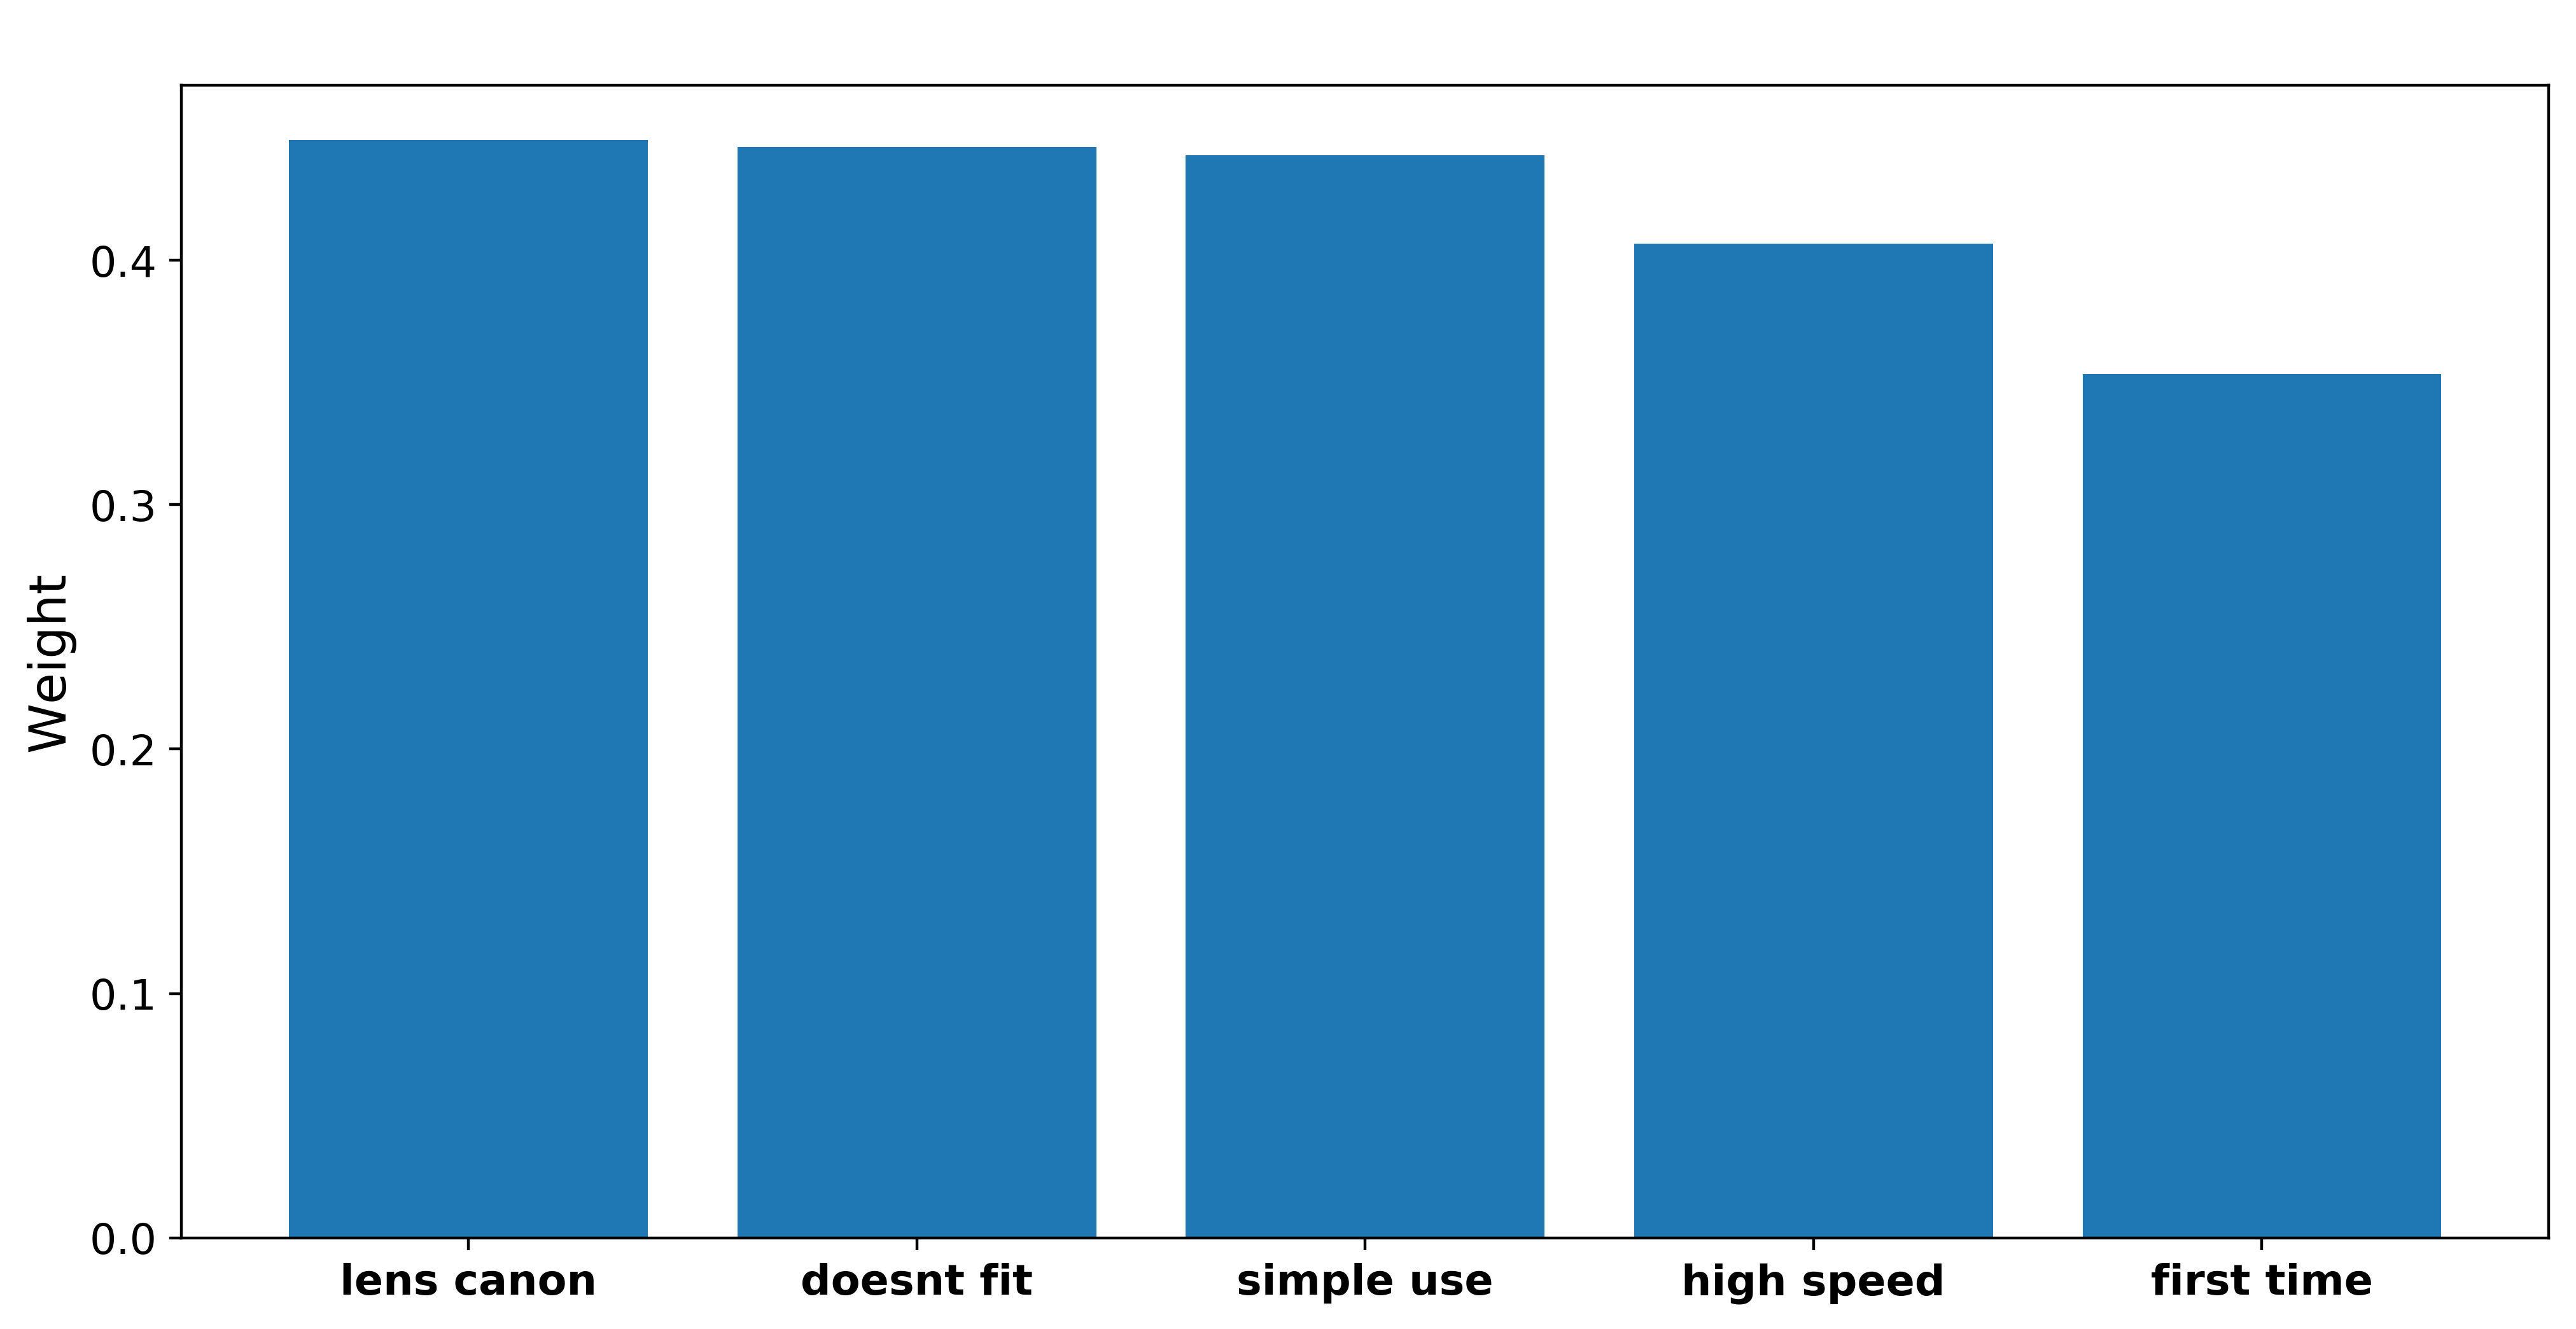

In [21]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
import numpy as np
matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['figure.dpi'] = 400
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['xtick.color'] = 'black'
matplotlib.rcParams['ytick.color'] = 'black'
fig = plt.figure(figsize=(12, 6))
fig.patch.set_alpha(0);
ax = fig.add_subplot(111)
ax.patch.set_alpha(0);
plt.xticks(weight = 'bold')
x=np.array(['lens canon','doesnt fit','simple use','high speed','first time'])
y=np.array([bi_dictionary['lens canon'],bi_dictionary['doesnt fit'],bi_dictionary['simple use'],bi_dictionary['high speed'],bi_dictionary['first time']])
plt.bar(x,y)
plt.title("Top 5 important words for analysis and recommendation",color='white')
plt.xlabel("")
plt.ylabel('Weight')
plt.show()

#######################

In [22]:
countsUnigram = [(uni_count[w], w) for w in uni_count]
countsUnigram.sort()
countsUnigram.reverse()

In [23]:
unigrams = [x[1] for x in countsUnigram[:1000]]
unigramId = dict(zip(unigrams, range(len(unigrams))))
unigramSet = set(unigrams)

In [24]:
def feature_2(text, unigrams, unigramId):
    feat = [0]*len(unigrams)
    words = text.split()
    for i in words:
        #bigram = words[i] + " " + words[i+1]
        try:
            feat[unigramId[i]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [25]:
def feature_3(text):
    feat = [0]*len(combineds)
    words = text.split()
    for i in range(len(words)-1):
        bigram = words[i] + " " + words[i+1]
        try:
            feat[combinedId[bigram]] += 1
        except KeyError:
            continue
    for w in words:
        try:
            feat[combinedId[w]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [26]:
X_uni = []
for i in range(len(all_data)):
    X_uni.append(feature_2(review_text[i], unigrams, unigramId))
y_uni = [d['overall'] for d in all_data]

In [27]:
print(len(X_uni), len(y_uni))

59991 59991


In [28]:
reg = 1.0
clf_uni = linear_model.Ridge()
clf_uni.fit(X_uni, y_uni)
theta_uni = clf_uni.coef_
pred_uni = clf_uni.predict(X_uni)

In [29]:
max_index = np.argsort(theta_uni)[-200:][::-1]
print(len(theta_uni[max_index]))
print(theta_uni[max_index])
#print(np.array(bigrams)[max_index - 1])
tmp_uni = np.array(unigrams)[max_index - 1]
print(tmp_uni)

200
[0.36309917 0.33625982 0.29968798 0.29297368 0.2923997  0.28714743
 0.28672893 0.26817189 0.24788389 0.24606117 0.23798562 0.23478111
 0.23419394 0.23182124 0.22704819 0.22426016 0.22275221 0.21960129
 0.21890364 0.21572624 0.21313574 0.20664879 0.2029519  0.20244301
 0.19966612 0.19902091 0.18154183 0.18135312 0.1784691  0.17756497
 0.17339201 0.17251133 0.17083487 0.16814103 0.16370778 0.15644785
 0.15350544 0.15278556 0.14882924 0.14833241 0.14521893 0.14342998
 0.14185943 0.13717079 0.13716766 0.13657187 0.13572205 0.13482516
 0.13352993 0.13296125 0.13218513 0.13215439 0.13137361 0.1311636
 0.12525104 0.12398516 0.12389539 0.12352346 0.12348193 0.12317483
 0.12130263 0.11999589 0.11948336 0.11920408 0.11660248 0.11532191
 0.11422068 0.11404433 0.11389095 0.11285296 0.11098564 0.1095385
 0.10873027 0.10825824 0.107776   0.10774668 0.1069516  0.10571529
 0.10471821 0.10394084 0.10319091 0.10253698 0.10058141 0.09966789
 0.09963246 0.09948004 0.09891334 0.09786926 0.09776659 0.09

##### get low ratting data ####

In [30]:
########################################
#   not using for now                  #
########################################

# def get_bigrams(all_data, count):
#     bigramCount = defaultdict(int)
#     punctuation = set(string.punctuation)
#     for d in all_data:
#         r = ''.join([c for c in d['reviewText'].lower() if not c in punctuation])
#         words = r.split()
#         for i in range(0,len(words)-1):
#             bigram = words[i] + " " + words[i+1]
#             bigramCount[bigram] += 1
#     countsBigram = [(bigramCount[d], d) for d in bigramCount.keys()]
#     countsBigram.sort()
#     countsBigram.reverse()
#     bigrams = [c[1] for c in countsBigram[:count]]
#     bigramId = dict(zip(bigrams, range(len(bigrams))))
#     bigramSet = set(bigrams)
#     return bigramId, bigramSet, countsBigram

# def get_unigrams(all_data, count):
#     unigramCount = defaultdict(int)
#     for d in all_data:
#         r = ''.join([c for c in d['reviewText'].lower() if not c in punctuation])
#         for w in r.split():
#             unigramCount[w] += 1
#     countsUnigram = [(unigramCount[w], w) for w in unigramCount]
#     countsUnigram.sort()
#     countsUnigram.reverse()
#     unigrams = [x[1] for x in countsUnigram[:count]]
#     unigramId = dict(zip(unigrams, range(len(unigrams))))
#     unigramSet = set(unigrams)
#     return unigramId, unigramSet, countsUnigram

# def get_training_data(all_data, review_text):
#     X = []
#     for i in range(len(all_data)):
#         X.append(feature_3(review_text[i]))
#     y = [d['overall'] for d in all_data]
#     return X, y

In [31]:
def data_by_low_rating(all_data, rating):
    ratings_data = []
    for d in all_data:
        if d['overall'] == rating:
            ratings_data.append(d)
    #print(len(ratings_data))
    return ratings_data

low_ratings = data_by_low_rating(all_data, 1.0)
#reviewText_low = [''.join([c for c in datum['reviewText'].lower() if not c in punctuation]) for datum in low_ratings]

In [32]:
low_uni_count, low_bi_count, low_reviews = only_adj_and_noun(low_ratings)

In [33]:
low_uni_count, low_bi_count = Counter(low_uni_count), Counter(low_bi_count)

In [34]:
print(low_uni_count.most_common(50))

[('one', 1160), ('would', 869), ('filter', 841), ('work', 812), ('get', 807), ('product', 746), ('lens', 673), ('even', 651), ('use', 628), ('dont', 600), ('bought', 559), ('like', 557), ('time', 540), ('good', 533), ('quality', 528), ('back', 527), ('buy', 522), ('cable', 509), ('got', 439), ('im', 417), ('amazon', 412), ('used', 404), ('money', 401), ('new', 401), ('could', 379), ('well', 378), ('problem', 367), ('better', 364), ('unit', 360), ('didnt', 353), ('first', 345), ('cheap', 343), ('much', 341), ('return', 327), ('two', 322), ('also', 320), ('tried', 317), ('sound', 310), ('camera', 305), ('thing', 303), ('doesnt', 298), ('card', 297), ('using', 296), ('ive', 295), ('case', 294), ('way', 288), ('really', 283), ('never', 278), ('great', 273), ('bad', 272)]


In [35]:
print(low_bi_count.most_common(50))

[('waste money', 114), ('customer service', 96), ('dont know', 95), ('didnt work', 91), ('doesnt work', 81), ('dont buy', 79), ('uv filter', 76), ('tech support', 65), ('stopped working', 64), ('sound quality', 60), ('case logic', 58), ('would recommend', 57), ('dont waste', 56), ('cheap cheap', 55), ('even though', 51), ('would work', 49), ('piece junk', 48), ('years ago', 48), ('much better', 47), ('get pay', 46), ('new one', 45), ('poor quality', 42), ('im sure', 41), ('brand new', 41), ('sent back', 41), ('save money', 41), ('waste time', 40), ('make sure', 40), ('read reviews', 39), ('barnes noble', 39), ('could get', 38), ('first time', 37), ('every time', 36), ('didnt even', 32), ('thought would', 32), ('im going', 32), ('stay away', 32), ('volume control', 31), ('never buy', 30), ('dvd player', 30), ('looks like', 29), ('send back', 29), ('one star', 29), ('bought one', 28), ('bought two', 28), ('credit card', 28), ('one day', 28), ('something else', 28), ('several times', 28),

In [36]:
low_dictionary = dict(low_bi_count.most_common(100))
low_dictionary['waste money']=0

In [38]:
f=""
for i in low_dictionary.keys():
    temp = i * low_dictionary[i]
    f = f + temp

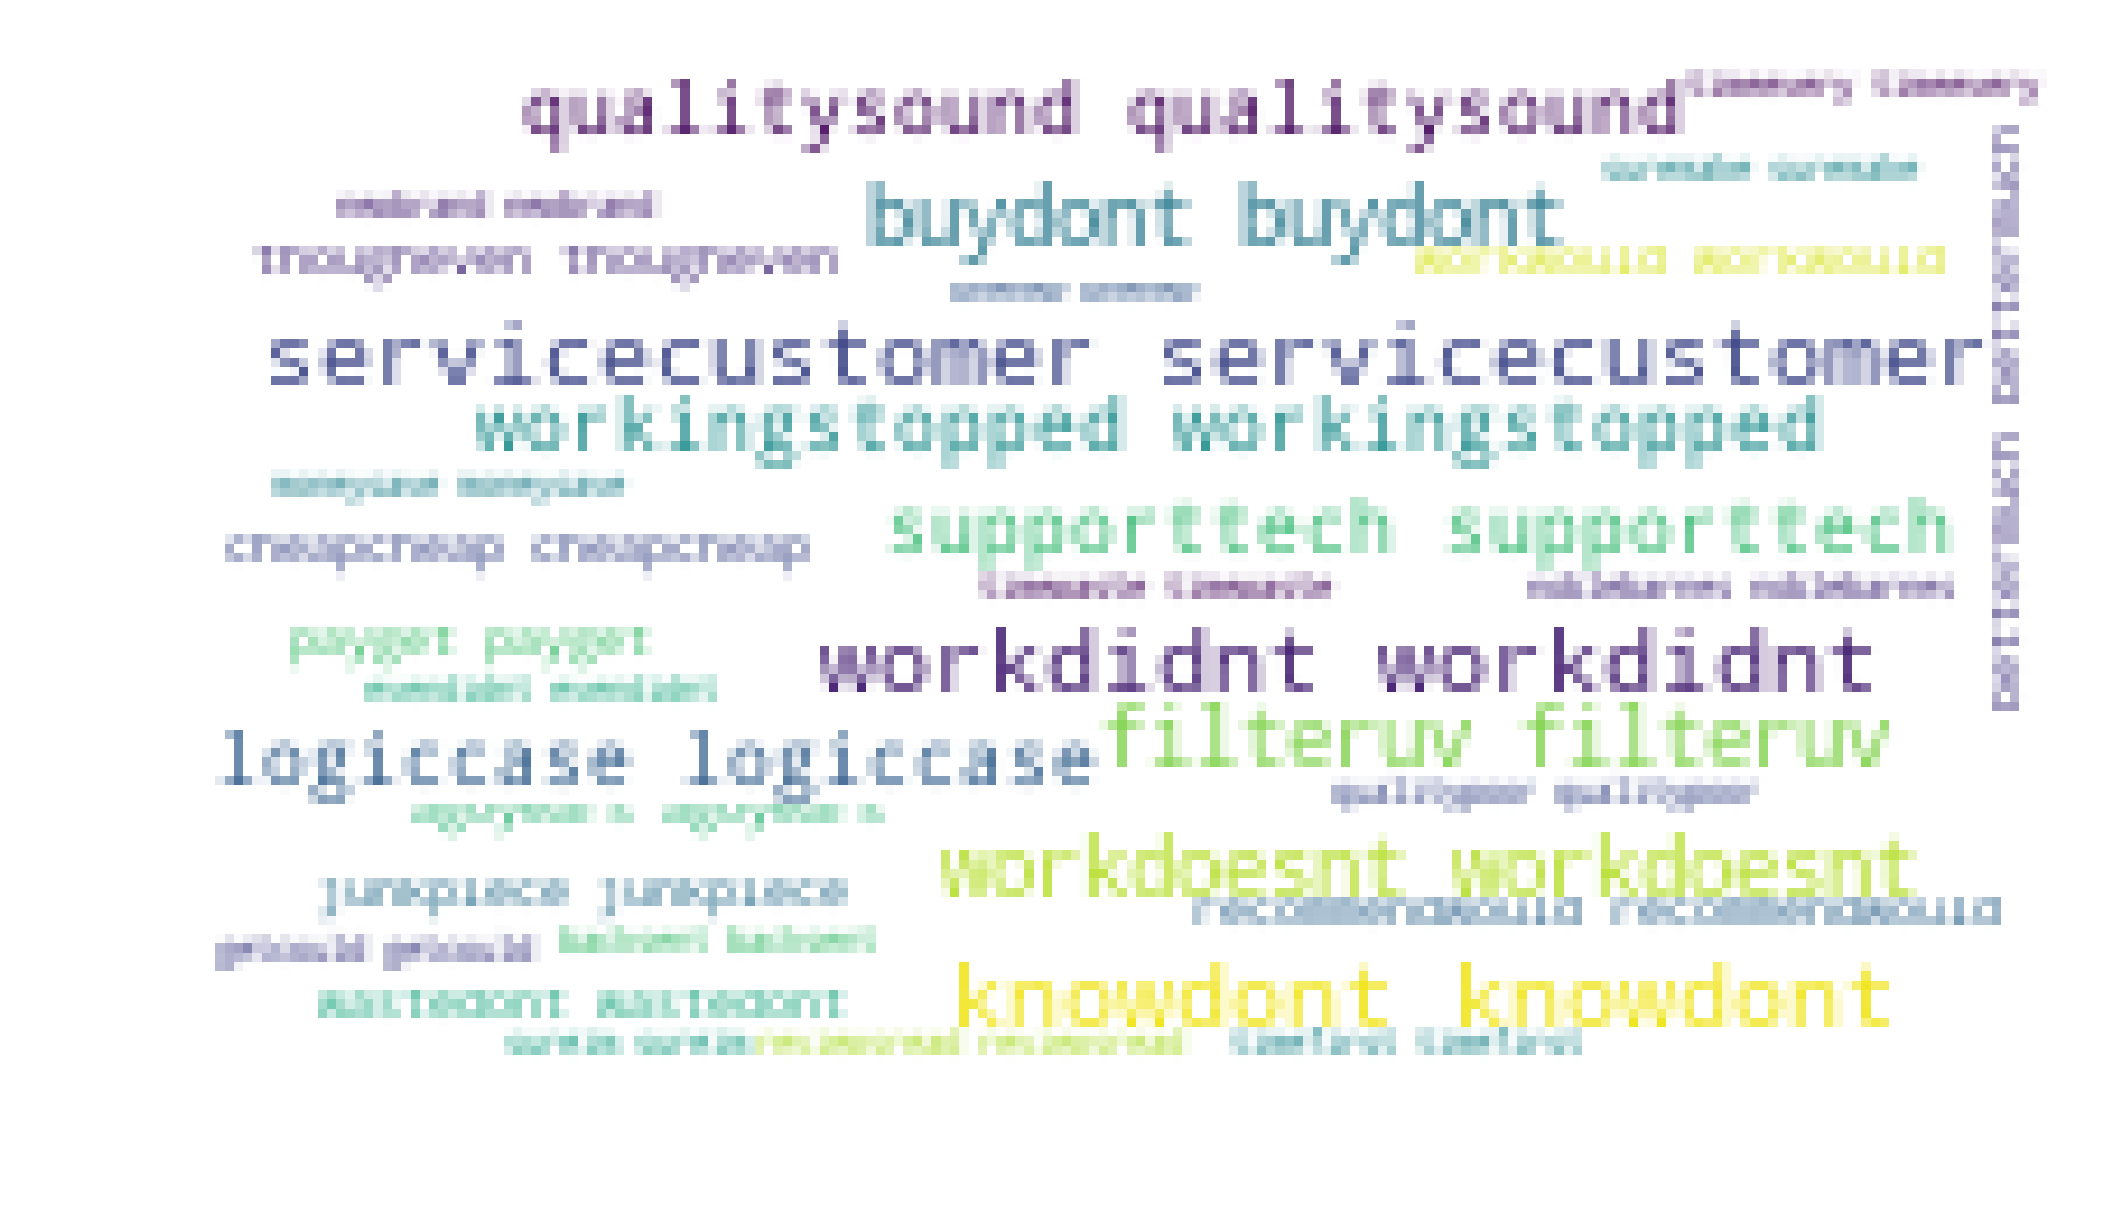

In [39]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=200, height=110, margin=2).generate(f)
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('test.png')

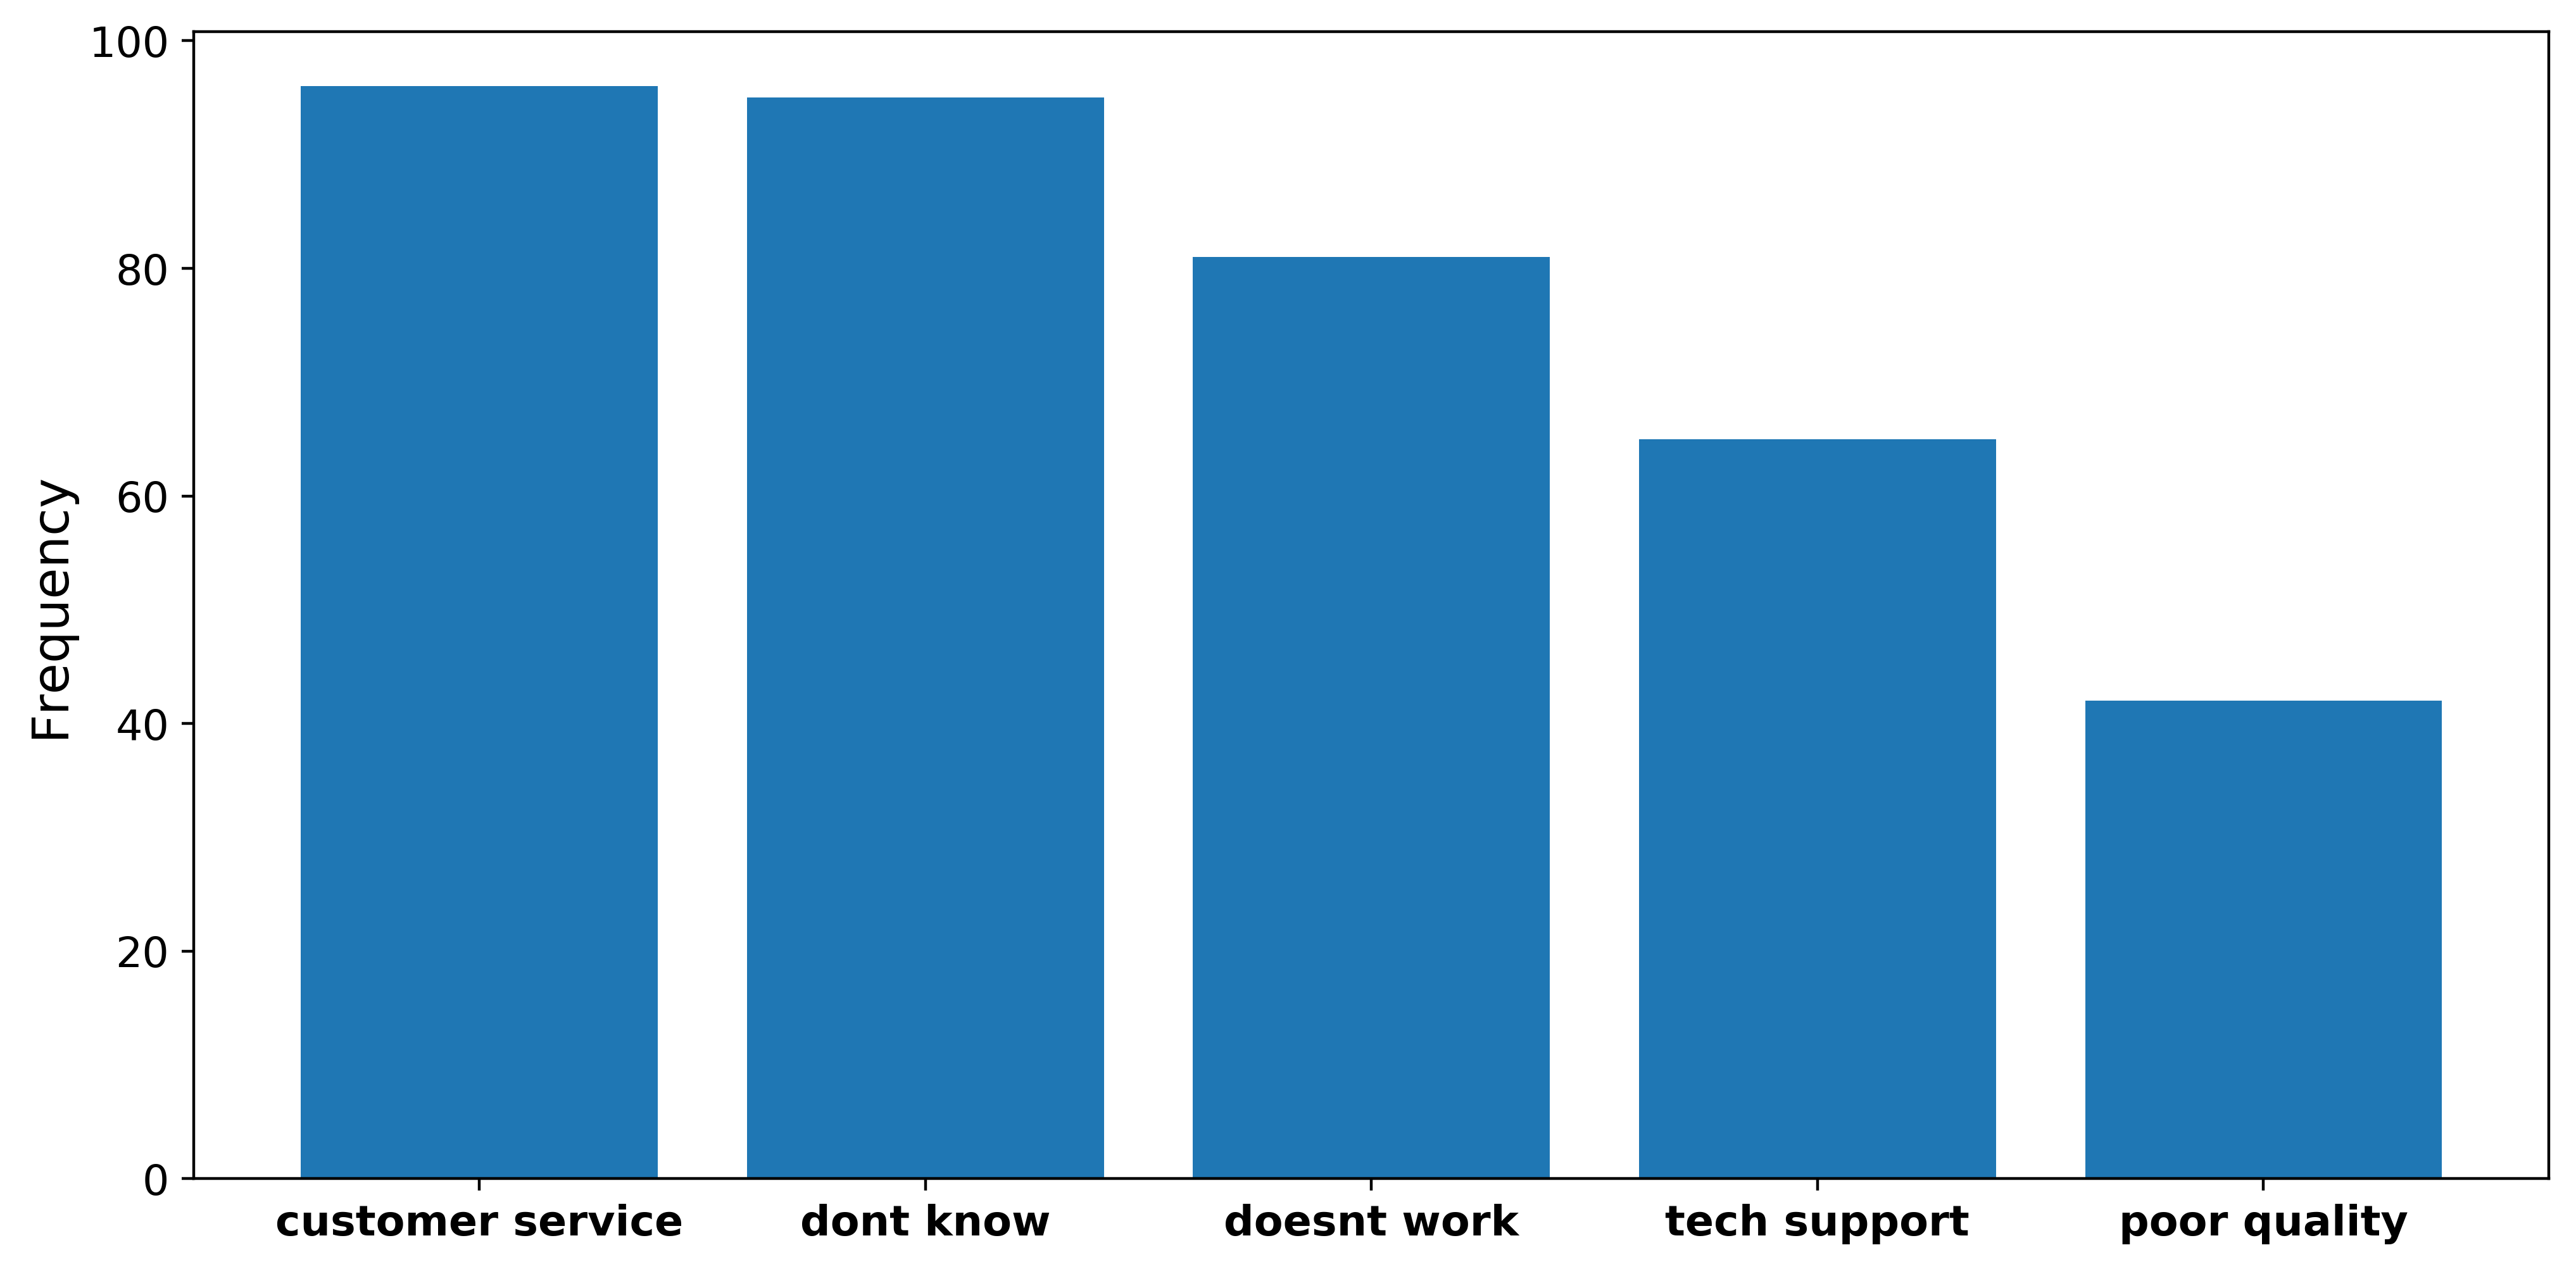

In [29]:
matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['figure.dpi'] = 400
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['xtick.color'] = 'black'
matplotlib.rcParams['ytick.color'] = 'black'
fig = plt.figure(figsize=(12, 6))
fig.patch.set_alpha(0);
ax = fig.add_subplot(111)
ax.patch.set_alpha(0);
plt.xticks(weight = 'bold')
x_low=np.array(['customer service','dont know','doesnt work','tech support','poor quality'])
y_low=np.array([96,95,81,65,42])
plt.bar(x_low,y_low)
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

Get high rating data(5 stars)

In [96]:
def data_by_high_rating(all_data, rating):
    ratings_data = []
    for d in all_data:
        if d['overall'] == rating:
            ratings_data.append(d)
    #print(len(ratings_data))
    return ratings_data

high_ratings = data_by_high_rating(all_data, 5.0)

In [97]:
high_uni_count, high_bi_count, high_reviews = only_adj_and_noun(high_ratings)

In [98]:
high_uni_count, high_bi_count = Counter(high_uni_count), Counter(high_bi_count)

In [99]:
print(high_uni_count.most_common(50))

[('great', 13898), ('good', 9843), ('lens', 9609), ('one', 8791), ('use', 8148), ('works', 7559), ('well', 6727), ('quality', 6402), ('price', 6271), ('like', 5940), ('camera', 4933), ('get', 4932), ('product', 4881), ('sound', 4791), ('would', 4724), ('cable', 4692), ('headphones', 4579), ('bought', 4115), ('filter', 3930), ('dont', 3808), ('much', 3796), ('used', 3744), ('time', 3631), ('also', 3615), ('buy', 3592), ('ive', 3558), ('really', 3447), ('need', 3359), ('work', 3269), ('using', 3172), ('im', 3088), ('easy', 3062), ('better', 2964), ('even', 2881), ('nice', 2849), ('still', 2829), ('years', 2736), ('little', 2664), ('perfect', 2659), ('love', 2644), ('best', 2580), ('excellent', 2500), ('power', 2432), ('recommend', 2412), ('want', 2391), ('got', 2341), ('long', 2309), ('needed', 2305), ('new', 2296), ('without', 2287)]


In [100]:
print(high_bi_count.most_common(50))

[('works great', 2227), ('works well', 1032), ('great product', 930), ('good quality', 904), ('great price', 896), ('sound quality', 800), ('highly recommend', 752), ('good price', 620), ('easy use', 609), ('well made', 606), ('would recommend', 590), ('uv filter', 561), ('high quality', 556), ('works fine', 546), ('good product', 463), ('protect lens', 445), ('works perfectly', 430), ('much better', 427), ('surge protector', 402), ('work great', 393), ('highly recommended', 381), ('ive used', 371), ('worked great', 367), ('years ago', 363), ('tripp lite', 359), ('go wrong', 338), ('digital camera', 335), ('make sure', 332), ('work well', 328), ('would buy', 326), ('great quality', 321), ('dont know', 313), ('sound great', 310), ('easy install', 300), ('long time', 297), ('datahookproductlinklinked classalinknormal', 292), ('great sound', 290), ('cant beat', 287), ('works like', 285), ('excellent product', 276), ('well worth', 274), ('camera lens', 269), ('another one', 268), ('great v

In [57]:
type(high_uni_count)

collections.Counter

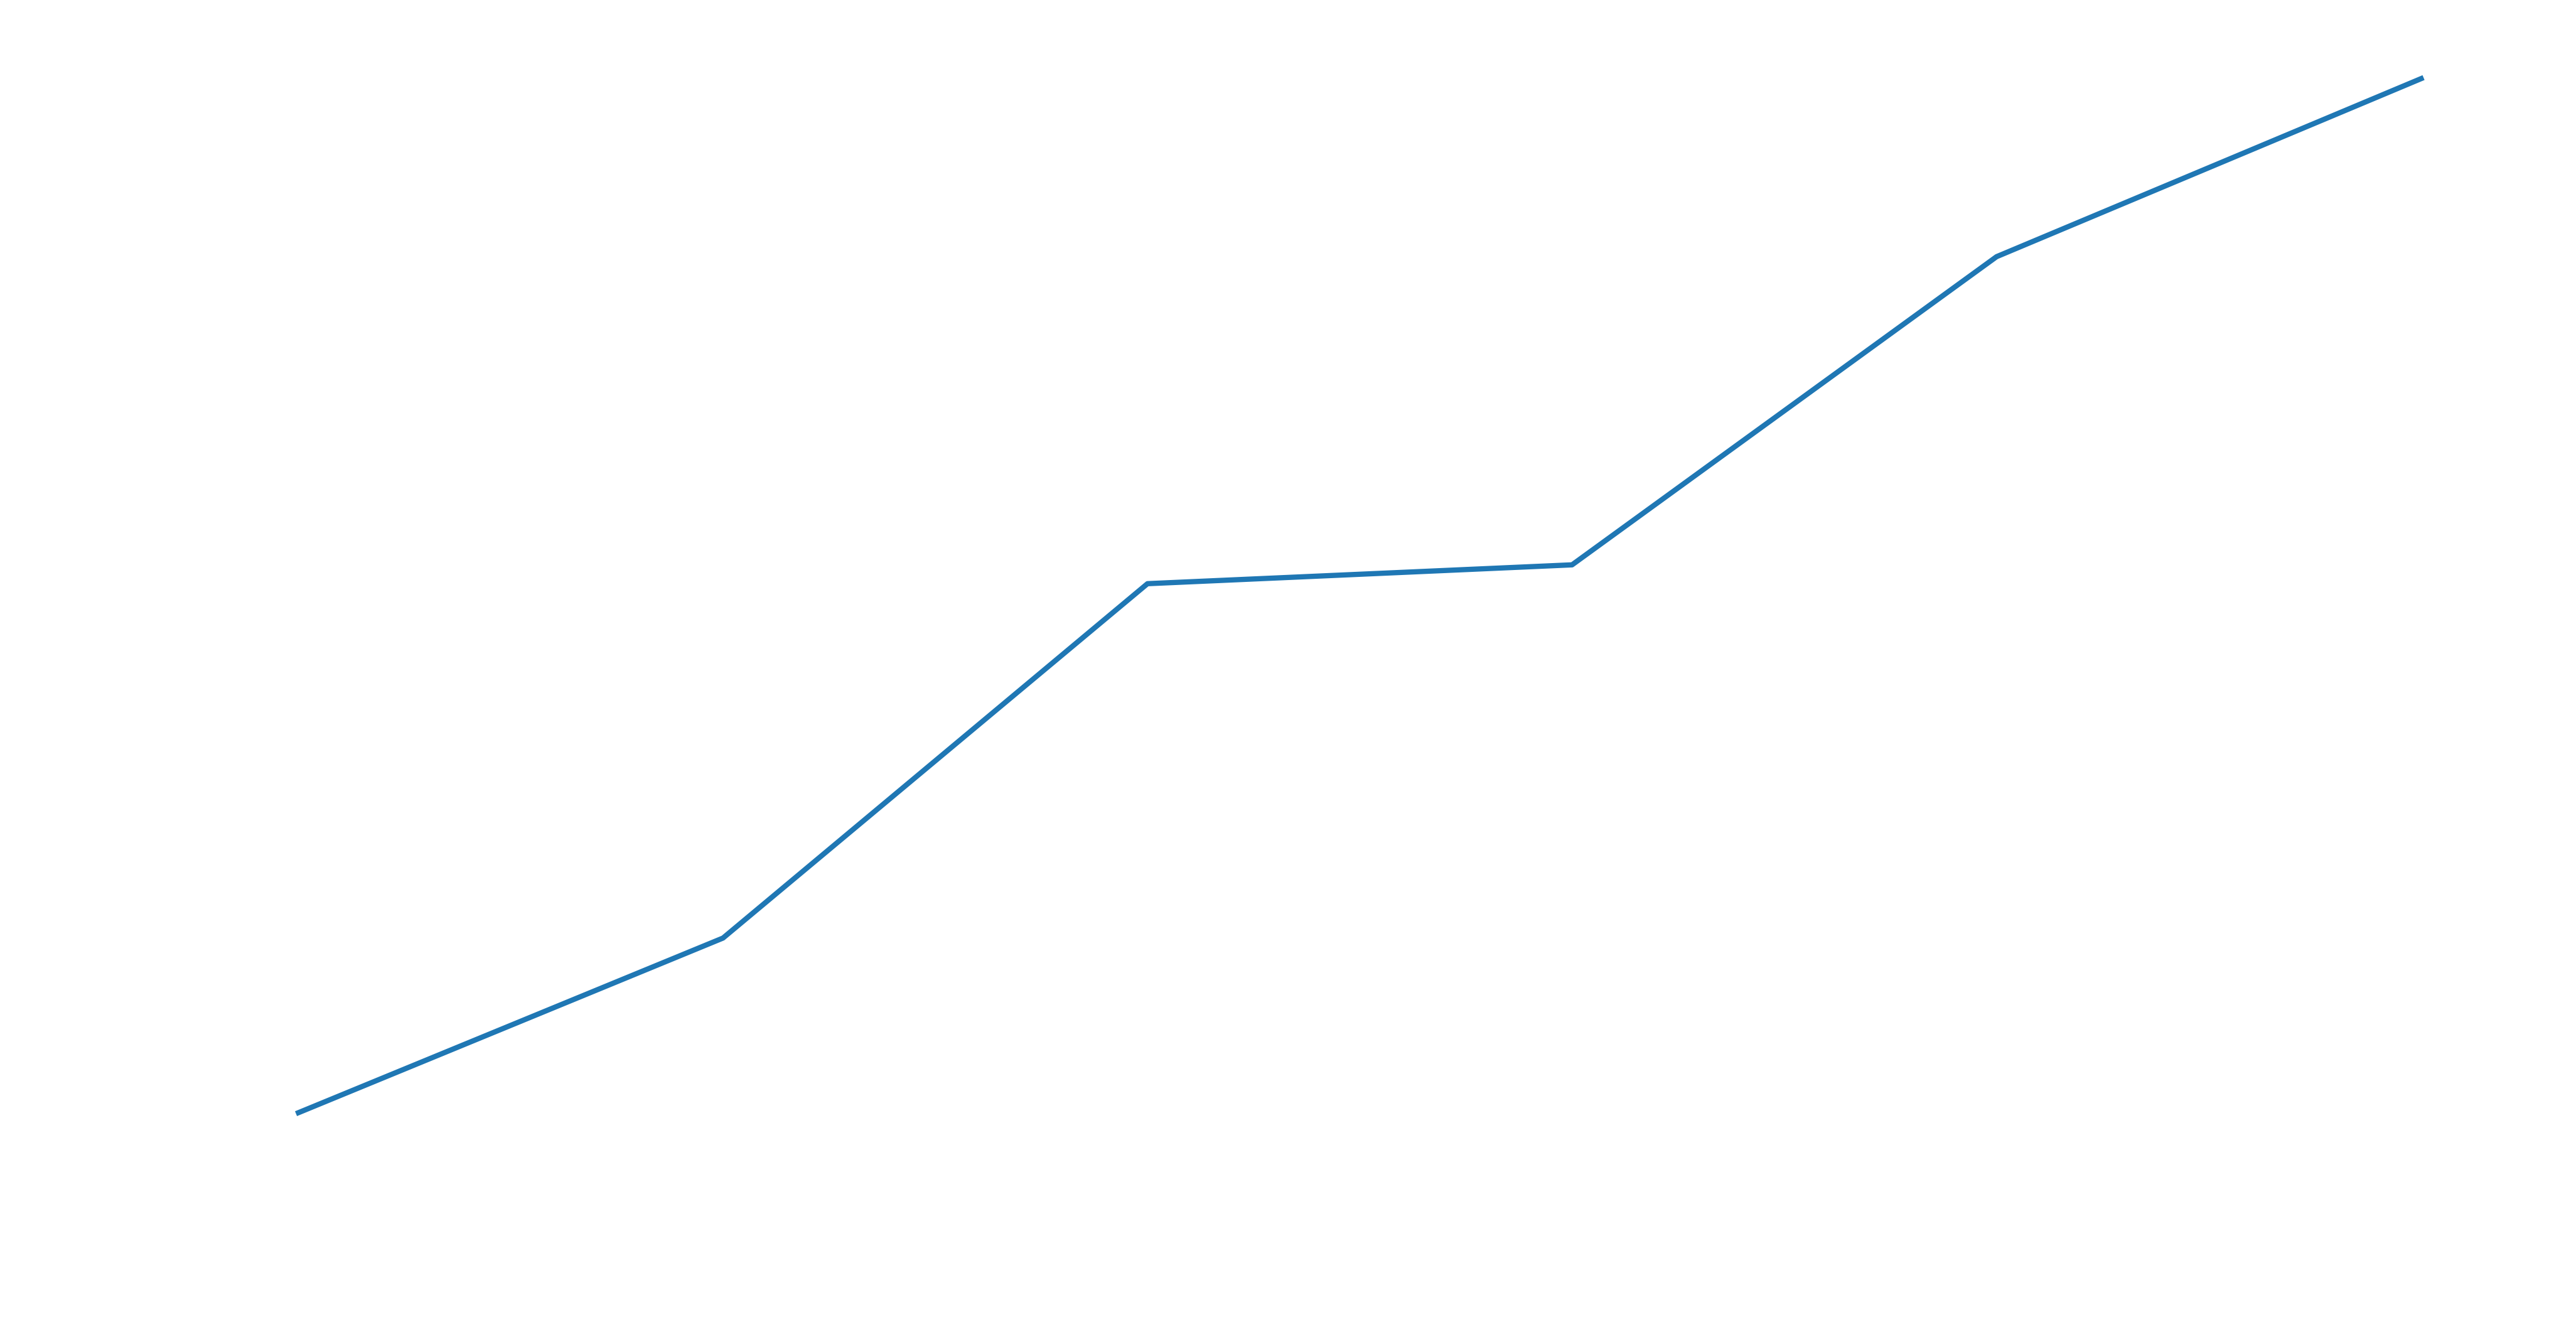

In [103]:
plt.figure(figsize=(12, 6))
x=np.array(['easy install','surge protector','easy use','good price','sound quality','good quality'])
y=np.array([300,402,609,620,800,904])
plt.plot(x,y)
plt.xlabel('Top 6 important words for high rating')
plt.ylabel('Frequency')
plt.show()

In [101]:
x_2014=np.array(['easy install','surge protector','easy use','good price','sound quality','good quality'])
y_2014=np.array([411,495,974,521,1457,759])

Text(0,0.5,'Frequency')

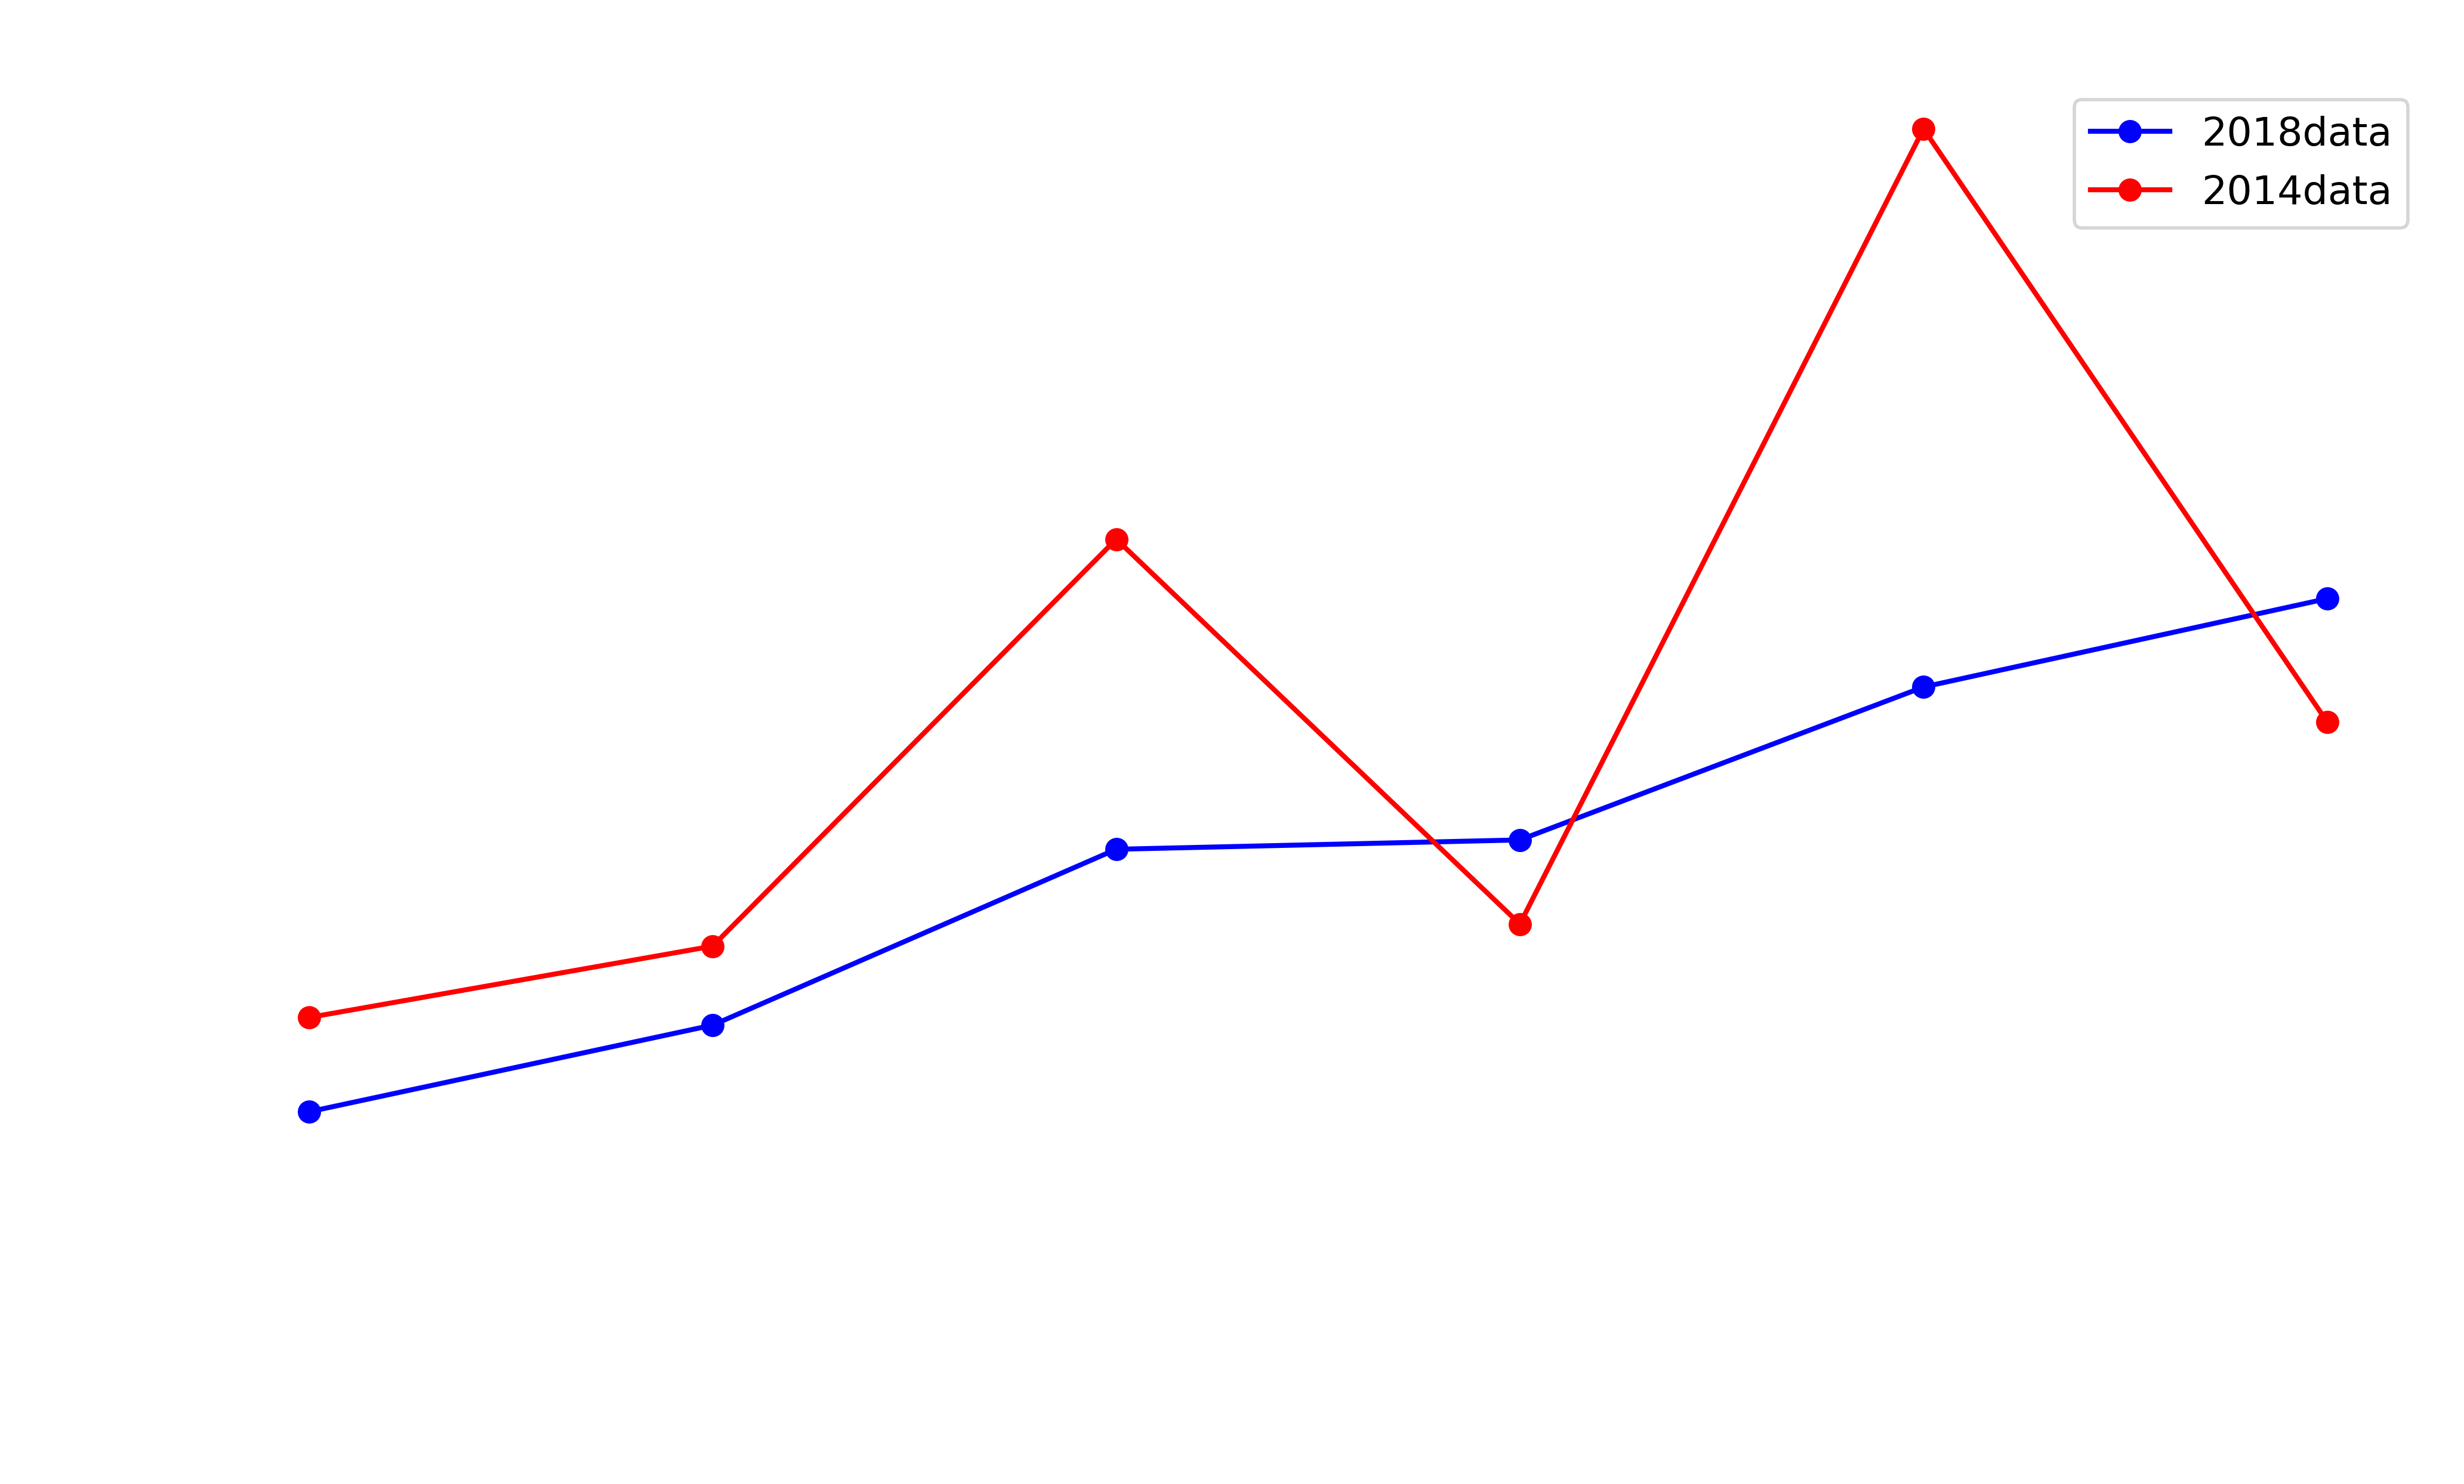

In [105]:
from matplotlib.pylab import subplots
matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['figure.dpi'] = 400
matplotlib.rcParams['axes.labelcolor'] = 'white'
matplotlib.rcParams['axes.edgecolor'] = 'white'
matplotlib.rcParams['xtick.color'] = 'white'
matplotlib.rcParams['ytick.color'] = 'white'
fig = plt.figure(figsize=(12, 6))
fig.patch.set_alpha(0);
ax = fig.add_subplot(111)
ax.patch.set_alpha(0);
plt.xticks(rotation = 45,weight = 'bold')
ax.plot(x,y,'b-o',x_2014,y_2014,'r-o')
ax.legend(('2018data','2014data'),loc='best')
plt.title("Frequency differnt of Top 6 important words of high rating",color='white')
plt.xlabel('')
plt.ylabel('Frequency')

In [1]:
import json
import numpy as np
from collections import defaultdict, Counter
import string
from sklearn import linear_model
import sys
import nltk
from nltk.corpus import stopwords 

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yaojunyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import spacy

In [4]:
f = open('Sports_and_Outdoors_5_2018.json','r').read()

In [5]:
type(f)

str

In [6]:
f_name = "Sports_and_Outdoors_5_2018.json"
all_data = []
with open(f_name, 'r') as f:
    line = f.readline()
    #print(line)
    while line:
        data = json.loads(line)
        all_data.append(data)
        line = f.readline()

In [7]:
all_data = all_data[:60000]

In [8]:
print(len(all_data))

60000


In [13]:
for i in all_data:
    if 'reviewText' not in i.keys() or 'overall' not in i.keys() or not i['reviewText'] or not i['overall']:
        all_data.remove(i)

In [14]:
print(len(all_data))

59981


In [15]:
def only_adj_and_noun(all_data):
    bigramCount = defaultdict(int)
    uniCount = defaultdict(int)
    punctuation = set(string.punctuation)
    stop_words = set(stopwords.words('english'))
    translator = str.maketrans('', '', string.punctuation)
    nlp=spacy.load("en_core_web_sm")

    review_text = []
    for d in all_data:
        #r = ''.join([c for c in d['reviewText'].lower() if not c in discard_set])
        r = d['reviewText'].translate(translator).lower()
        r = [word for word in r.split() if word not in stop_words and not word.isdigit()]
        #r = [word for word in r.split() if word not in stop_words and not word.isdigit()and word.pos_in("NOUN","ADJ")]
        review_text.append(" ".join(r))
        if r:
            prev = r[0]
            for i in range(1, len(r)):
                bigram = prev + " " + r[i]
                uniCount[r[i]] += 1
                bigramCount[bigram] += 1
                prev = r[i]
            uniCount[r[0]] += 1
    return uniCount, bigramCount, review_text

In [16]:
uni_count, bi_count, review_text = only_adj_and_noun(all_data)

In [17]:
print(len(bi_count), len(uni_count))

685541 42761


In [18]:
def feature(text, bigrams, bigramId):
    feat = [0]*len(bigrams)
    words = text.split()
    for i in range(len(words)-1):
        bigram = words[i] + " " + words[i+1]
        try:
            feat[bigramId[bigram]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [19]:
countsBigram = [(bi_count[d], d) for d in bi_count.keys()]
countsBigram.sort()
countsBigram.reverse()

In [20]:
bigrams = [c[1] for c in countsBigram[:1000]]
bigramId = dict(zip(bigrams, range(len(bigrams))))
bigramSet = set(bigrams)

In [21]:
print(review_text[1])

heck tutu nuns know cut still also arent several layers tutu making poof lays flat needless say returned


In [22]:
X_2 = []
for i in range(len(all_data)):
    X_2.append(feature(review_text[i], bigrams, bigramId))
y_2 = [d['overall'] for d in all_data]

In [23]:
reg = 1.0
clf_bi = linear_model.Ridge(reg, fit_intercept=False)
clf_bi.fit(X_2, y_2)
theta_bi = clf_bi.coef_
pred_bi = clf_bi.predict(X_2)

In [24]:
max_index = np.argsort(theta_bi)[-100:][::-1]
print(len(theta_bi[max_index]))
print(theta_bi[max_index])
#print(np.array(bigrams)[max_index - 1])
tmp_bigram = np.array(bigrams)[max_index - 1]
print(tmp_bigram)


100
[4.37837121 0.65052701 0.55151024 0.47264764 0.47115039 0.46466042
 0.46128023 0.45197375 0.44594606 0.44586798 0.44252413 0.43535781
 0.43262845 0.43008933 0.42685933 0.41617749 0.40995513 0.40980535
 0.39967301 0.39879364 0.39772409 0.39608995 0.3927771  0.39076066
 0.38887657 0.38205296 0.38071326 0.38037936 0.37997402 0.37887525
 0.3706349  0.37047105 0.36845138 0.36653352 0.36398085 0.36129161
 0.35791874 0.35445136 0.34701177 0.34624245 0.34472859 0.34452446
 0.34448355 0.33933154 0.33756708 0.33674003 0.33434761 0.33358729
 0.33176077 0.33081967 0.32882693 0.32861501 0.32716187 0.32647272
 0.32593933 0.32571964 0.32532801 0.32354127 0.32318879 0.32282189
 0.32181587 0.32101307 0.31996109 0.31957148 0.31934297 0.31843236
 0.31716503 0.3137552  0.31172744 0.31052926 0.30715372 0.30477442
 0.30231764 0.30194991 0.30094994 0.30024673 0.29962047 0.29948281
 0.29777712 0.2974511  0.29665469 0.2961826  0.29530206 0.29497601
 0.29482342 0.29458113 0.29451513 0.29270918 0.29201989 0.

In [25]:
bi_dictionary = {}
for i in range(len(tmp_bigram)):
    bi_dictionary[tmp_bigram[i]]=theta_bi[max_index][i]

In [26]:
bi_dictionary['daily use']

0.38037935981919907

In [27]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
import numpy as np
matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['figure.dpi'] = 400
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['xtick.color'] = 'black'
matplotlib.rcParams['ytick.color'] = 'black'
fig = plt.figure(figsize=(12, 6))
fig.patch.set_alpha(0);
ax = fig.add_subplot(111)
ax.patch.set_alpha(0);
plt.xticks(weight = 'bold')
x=np.array(['little smaller','cast iron','large hands','physical therapist','fair price'])
y=np.array([4.378,0.552,0.473,0.452,0.446])
plt.bar(x,y)
plt.xlabel("")
plt.ylabel('Weight')
plt.show()

<Figure size 4800x2400 with 1 Axes>

#######################

In [28]:
countsUnigram = [(uni_count[w], w) for w in uni_count]
countsUnigram.sort()
countsUnigram.reverse()

In [29]:
unigrams = [x[1] for x in countsUnigram[:1000]]
unigramId = dict(zip(unigrams, range(len(unigrams))))
unigramSet = set(unigrams)

In [30]:
def feature_2(text, unigrams, unigramId):
    feat = [0]*len(unigrams)
    words = text.split()
    for i in words:
        #bigram = words[i] + " " + words[i+1]
        try:
            feat[unigramId[i]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [31]:
def feature_3(text):
    feat = [0]*len(combineds)
    words = text.split()
    for i in range(len(words)-1):
        bigram = words[i] + " " + words[i+1]
        try:
            feat[combinedId[bigram]] += 1
        except KeyError:
            continue
    for w in words:
        try:
            feat[combinedId[w]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [32]:
X_uni = []
for i in range(len(all_data)):
    X_uni.append(feature_2(review_text[i], unigrams, unigramId))
y_uni = [d['overall'] for d in all_data]

In [33]:
print(len(X_uni), len(y_uni))

59981 59981


In [34]:
reg = 1.0
clf_uni = linear_model.Ridge()
clf_uni.fit(X_uni, y_uni)
theta_uni = clf_uni.coef_
pred_uni = clf_uni.predict(X_uni)

In [35]:
max_index = np.argsort(theta_uni)[-200:][::-1]
print(len(theta_uni[max_index]))
print(theta_uni[max_index])
#print(np.array(bigrams)[max_index - 1])
tmp_uni = np.array(unigrams)[max_index - 1]
print(tmp_uni)

200
[0.33791795 0.32316273 0.30467065 0.29899039 0.27610905 0.26889324
 0.26367328 0.25959392 0.25865773 0.25618227 0.24930643 0.24434474
 0.24021769 0.24019013 0.24001193 0.23736906 0.22780704 0.22535797
 0.21985661 0.2191687  0.21475607 0.21341608 0.21233073 0.2117592
 0.2067574  0.20482099 0.18679523 0.1860913  0.18494181 0.17515151
 0.17456212 0.17395107 0.16866779 0.16404296 0.16311407 0.16152086
 0.15791038 0.15690419 0.15681711 0.15492934 0.14972528 0.1491302
 0.1489347  0.14840535 0.14789884 0.14673444 0.14616684 0.14238548
 0.14225488 0.14148469 0.14118355 0.13923189 0.13765933 0.13557714
 0.13465867 0.13443178 0.13336946 0.13047593 0.12797043 0.12741879
 0.1263274  0.12404052 0.12278854 0.12218809 0.12131959 0.12098607
 0.11993363 0.11918101 0.11851331 0.11722436 0.11713186 0.11578841
 0.11474169 0.11355252 0.11340559 0.11218265 0.11217593 0.11114489
 0.11100633 0.11024839 0.10912088 0.1085218  0.10803129 0.10774193
 0.10693922 0.10651644 0.10414421 0.10411433 0.1031661  0.10

##### get low ratting data ####

In [36]:
########################################
#   not using for now                  #
########################################

# def get_bigrams(all_data, count):
#     bigramCount = defaultdict(int)
#     punctuation = set(string.punctuation)
#     for d in all_data:
#         r = ''.join([c for c in d['reviewText'].lower() if not c in punctuation])
#         words = r.split()
#         for i in range(0,len(words)-1):
#             bigram = words[i] + " " + words[i+1]
#             bigramCount[bigram] += 1
#     countsBigram = [(bigramCount[d], d) for d in bigramCount.keys()]
#     countsBigram.sort()
#     countsBigram.reverse()
#     bigrams = [c[1] for c in countsBigram[:count]]
#     bigramId = dict(zip(bigrams, range(len(bigrams))))
#     bigramSet = set(bigrams)
#     return bigramId, bigramSet, countsBigram

# def get_unigrams(all_data, count):
#     unigramCount = defaultdict(int)
#     for d in all_data:
#         r = ''.join([c for c in d['reviewText'].lower() if not c in punctuation])
#         for w in r.split():
#             unigramCount[w] += 1
#     countsUnigram = [(unigramCount[w], w) for w in unigramCount]
#     countsUnigram.sort()
#     countsUnigram.reverse()
#     unigrams = [x[1] for x in countsUnigram[:count]]
#     unigramId = dict(zip(unigrams, range(len(unigrams))))
#     unigramSet = set(unigrams)
#     return unigramId, unigramSet, countsUnigram

# def get_training_data(all_data, review_text):
#     X = []
#     for i in range(len(all_data)):
#         X.append(feature_3(review_text[i]))
#     y = [d['overall'] for d in all_data]
#     return X, y

In [37]:
def data_by_low_rating(all_data, rating):
    ratings_data = []
    for d in all_data:
        if d['overall'] == rating:
            ratings_data.append(d)
    #print(len(ratings_data))
    return ratings_data

low_ratings = data_by_low_rating(all_data, 1.0)
#reviewText_low = [''.join([c for c in datum['reviewText'].lower() if not c in punctuation]) for datum in low_ratings]

In [38]:
low_uni_count, low_bi_count, low_reviews = only_adj_and_noun(low_ratings)

In [39]:
low_uni_count, low_bi_count = Counter(low_uni_count), Counter(low_bi_count)

In [40]:
print(low_uni_count.most_common(50))

[('one', 643), ('would', 463), ('like', 377), ('use', 358), ('product', 330), ('get', 326), ('dont', 312), ('buy', 283), ('bought', 266), ('even', 263), ('time', 261), ('good', 259), ('first', 237), ('back', 236), ('made', 227), ('quality', 217), ('used', 209), ('im', 208), ('money', 199), ('got', 198), ('way', 198), ('two', 195), ('fit', 195), ('better', 191), ('work', 184), ('didnt', 183), ('much', 179), ('really', 172), ('could', 172), ('well', 170), ('cheap', 165), ('small', 165), ('size', 158), ('return', 155), ('also', 150), ('amazon', 150), ('put', 146), ('water', 138), ('thing', 137), ('doesnt', 137), ('gloves', 134), ('still', 129), ('bad', 125), ('old', 125), ('great', 124), ('broke', 123), ('waste', 122), ('make', 122), ('plastic', 117), ('right', 114)]


In [41]:
print(low_bi_count.most_common(50))

[('waste money', 84), ('dont buy', 54), ('first time', 52), ('dont know', 38), ('dont waste', 37), ('would recommend', 36), ('year old', 34), ('poor quality', 31), ('customer service', 30), ('cheaply made', 27), ('put together', 27), ('get pay', 26), ('looks like', 26), ('first use', 25), ('much better', 25), ('piece junk', 24), ('sent back', 24), ('one star', 24), ('made china', 22), ('buyer beware', 21), ('time used', 20), ('didnt work', 20), ('poorly made', 20), ('new one', 20), ('im sure', 19), ('mountain house', 19), ('waste time', 18), ('could get', 18), ('would work', 18), ('doesnt work', 18), ('one side', 18), ('save money', 18), ('didnt even', 17), ('quality control', 17), ('fell apart', 17), ('every time', 17), ('send back', 16), ('first one', 16), ('recommend product', 15), ('good quality', 15), ('ive ever', 15), ('im going', 15), ('even though', 15), ('broke first', 15), ('something else', 15), ('cheap plastic', 14), ('way small', 14), ('dont think', 14), ('didnt fit', 14),

In [42]:
low_dictionary = dict(low_bi_count.most_common(100))

In [45]:
f = ''
for i in low_dictionary.keys():
    temp = i * low_dictionary[i]
    f = f + temp

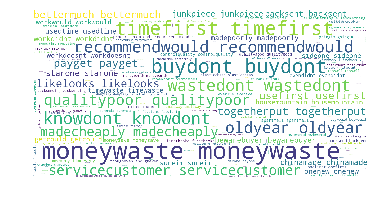

In [53]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1600, height=800, margin=2).generate(f)
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('test.png')

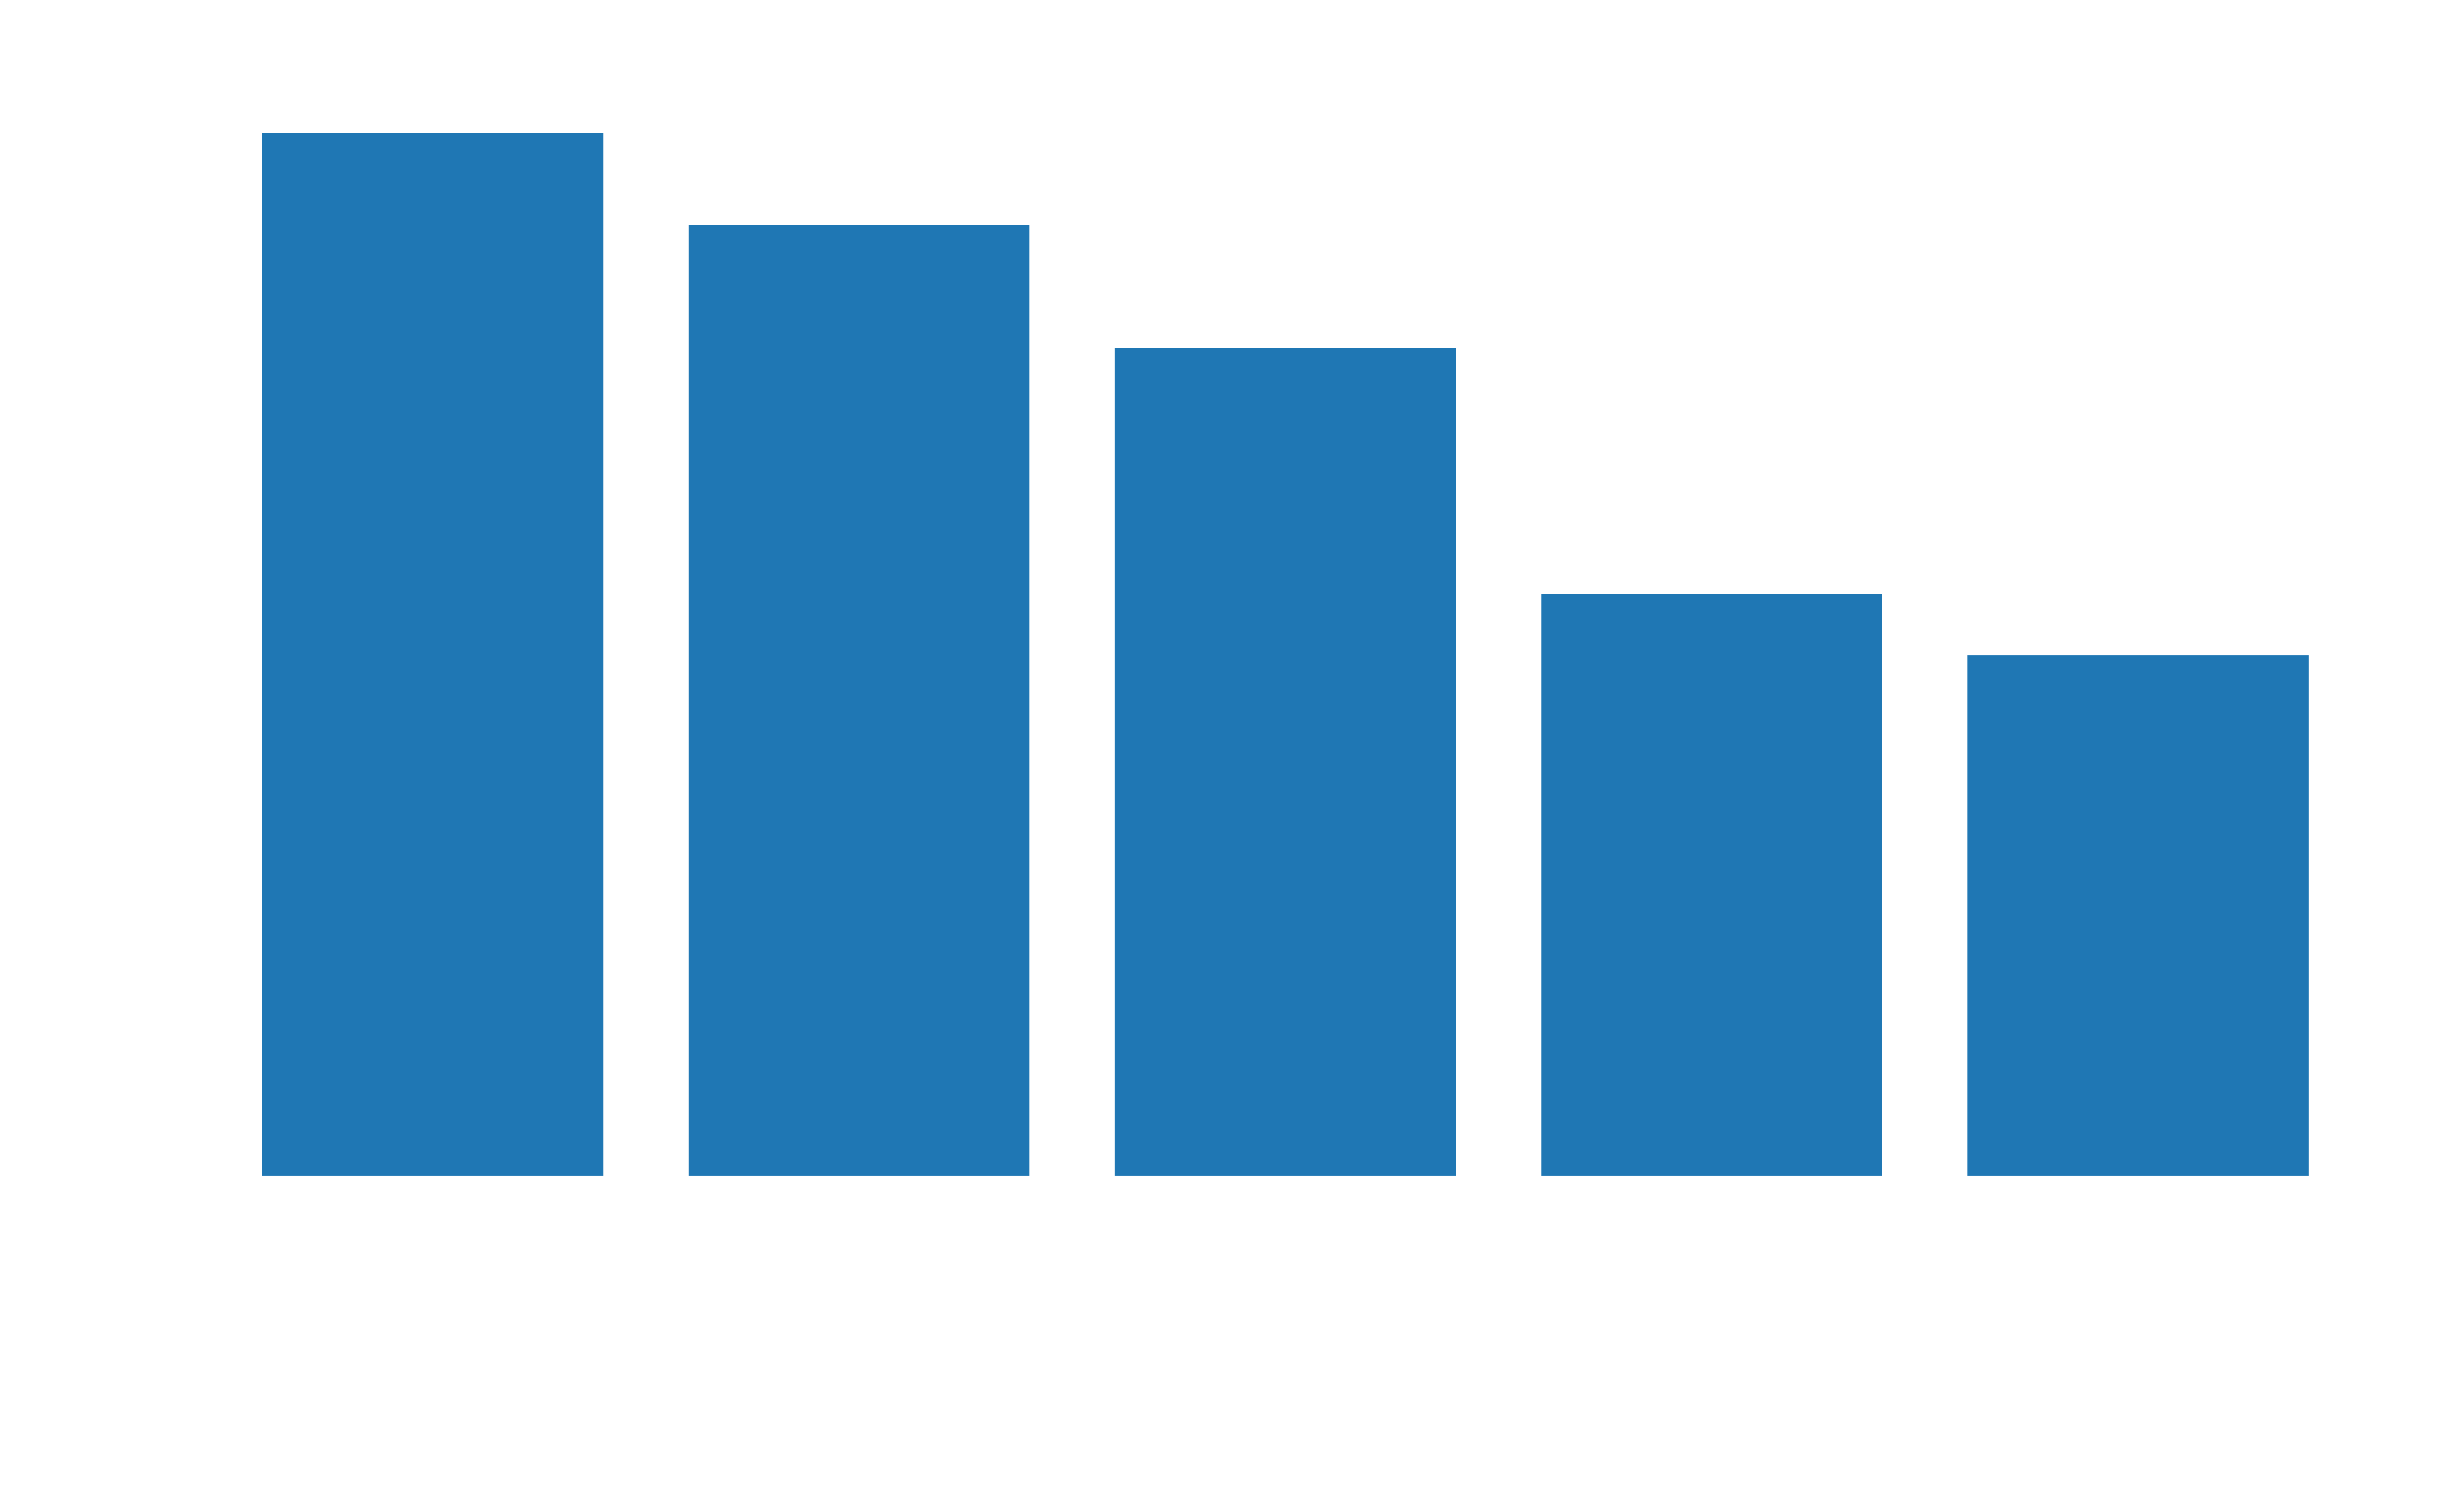

In [54]:
matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['figure.dpi'] = 400
matplotlib.rcParams['axes.labelcolor'] = 'white'
matplotlib.rcParams['axes.edgecolor'] = 'white'
matplotlib.rcParams['xtick.color'] = 'white'
matplotlib.rcParams['ytick.color'] = 'white'
fig = plt.figure(figsize=(12, 6))
fig.patch.set_alpha(0);
ax = fig.add_subplot(111)
ax.patch.set_alpha(0);
plt.xticks(rotation = 45,weight = 'bold')
x_low=np.array(['year old','poor quality','cheaply made','mountain house','quality control'])
y_low=np.array([34,31,27,19,17])
plt.bar(x_low,y_low)
plt.title("Top 5 important words for low rating",color='white')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

Get high rating data(5 stars)

In [36]:
def data_by_high_rating(all_data, rating):
    ratings_data = []
    for d in all_data:
        if d['overall'] == rating:
            ratings_data.append(d)
    #print(len(ratings_data))
    return ratings_data

high_ratings = data_by_high_rating(all_data, 5.0)

In [37]:
high_uni_count, high_bi_count, high_reviews = only_adj_and_noun(high_ratings)

In [38]:
high_uni_count, high_bi_count = Counter(high_uni_count), Counter(high_bi_count)

In [39]:
print(high_uni_count.most_common(50))

[('great', 13967), ('good', 8329), ('use', 7443), ('one', 7215), ('well', 6745), ('like', 5324), ('product', 4323), ('would', 4188), ('get', 4083), ('easy', 3932), ('works', 3889), ('love', 3784), ('quality', 3753), ('price', 3595), ('used', 3586), ('nice', 3509), ('really', 3358), ('bought', 3299), ('perfect', 3281), ('fit', 3241), ('time', 3213), ('work', 3039), ('little', 2913), ('dont', 2824), ('also', 2782), ('much', 2746), ('made', 2582), ('im', 2545), ('knife', 2444), ('buy', 2394), ('using', 2332), ('ive', 2315), ('recommend', 2239), ('size', 2229), ('years', 2208), ('need', 2192), ('got', 2186), ('best', 2129), ('even', 2080), ('better', 2055), ('long', 1989), ('water', 1984), ('go', 1930), ('back', 1927), ('still', 1908), ('keep', 1865), ('comfortable', 1835), ('put', 1801), ('small', 1775), ('enough', 1773)]


In [40]:
print(high_bi_count.most_common(50))

[('works great', 1322), ('great product', 1107), ('well made', 979), ('good quality', 834), ('highly recommend', 760), ('great price', 678), ('year old', 665), ('works well', 658), ('would recommend', 597), ('easy use', 590), ('high quality', 474), ('good product', 456), ('work great', 456), ('tennis elbow', 456), ('great quality', 428), ('good price', 413), ('long time', 409), ('mountain house', 390), ('light weight', 355), ('every day', 340), ('make sure', 339), ('much better', 332), ('work well', 312), ('years ago', 301), ('really like', 301), ('ive used', 300), ('would buy', 296), ('highly recommended', 277), ('go wrong', 259), ('worked great', 256), ('excellent product', 256), ('easy install', 237), ('perfect fit', 235), ('fits well', 228), ('fit great', 228), ('last long', 224), ('well worth', 223), ('swiss army', 223), ('really good', 222), ('perfect size', 220), ('fit well', 215), ('heavy duty', 212), ('cant beat', 210), ('great value', 207), ('dont know', 207), ('fast shipping

In [41]:
type(high_uni_count)

collections.Counter

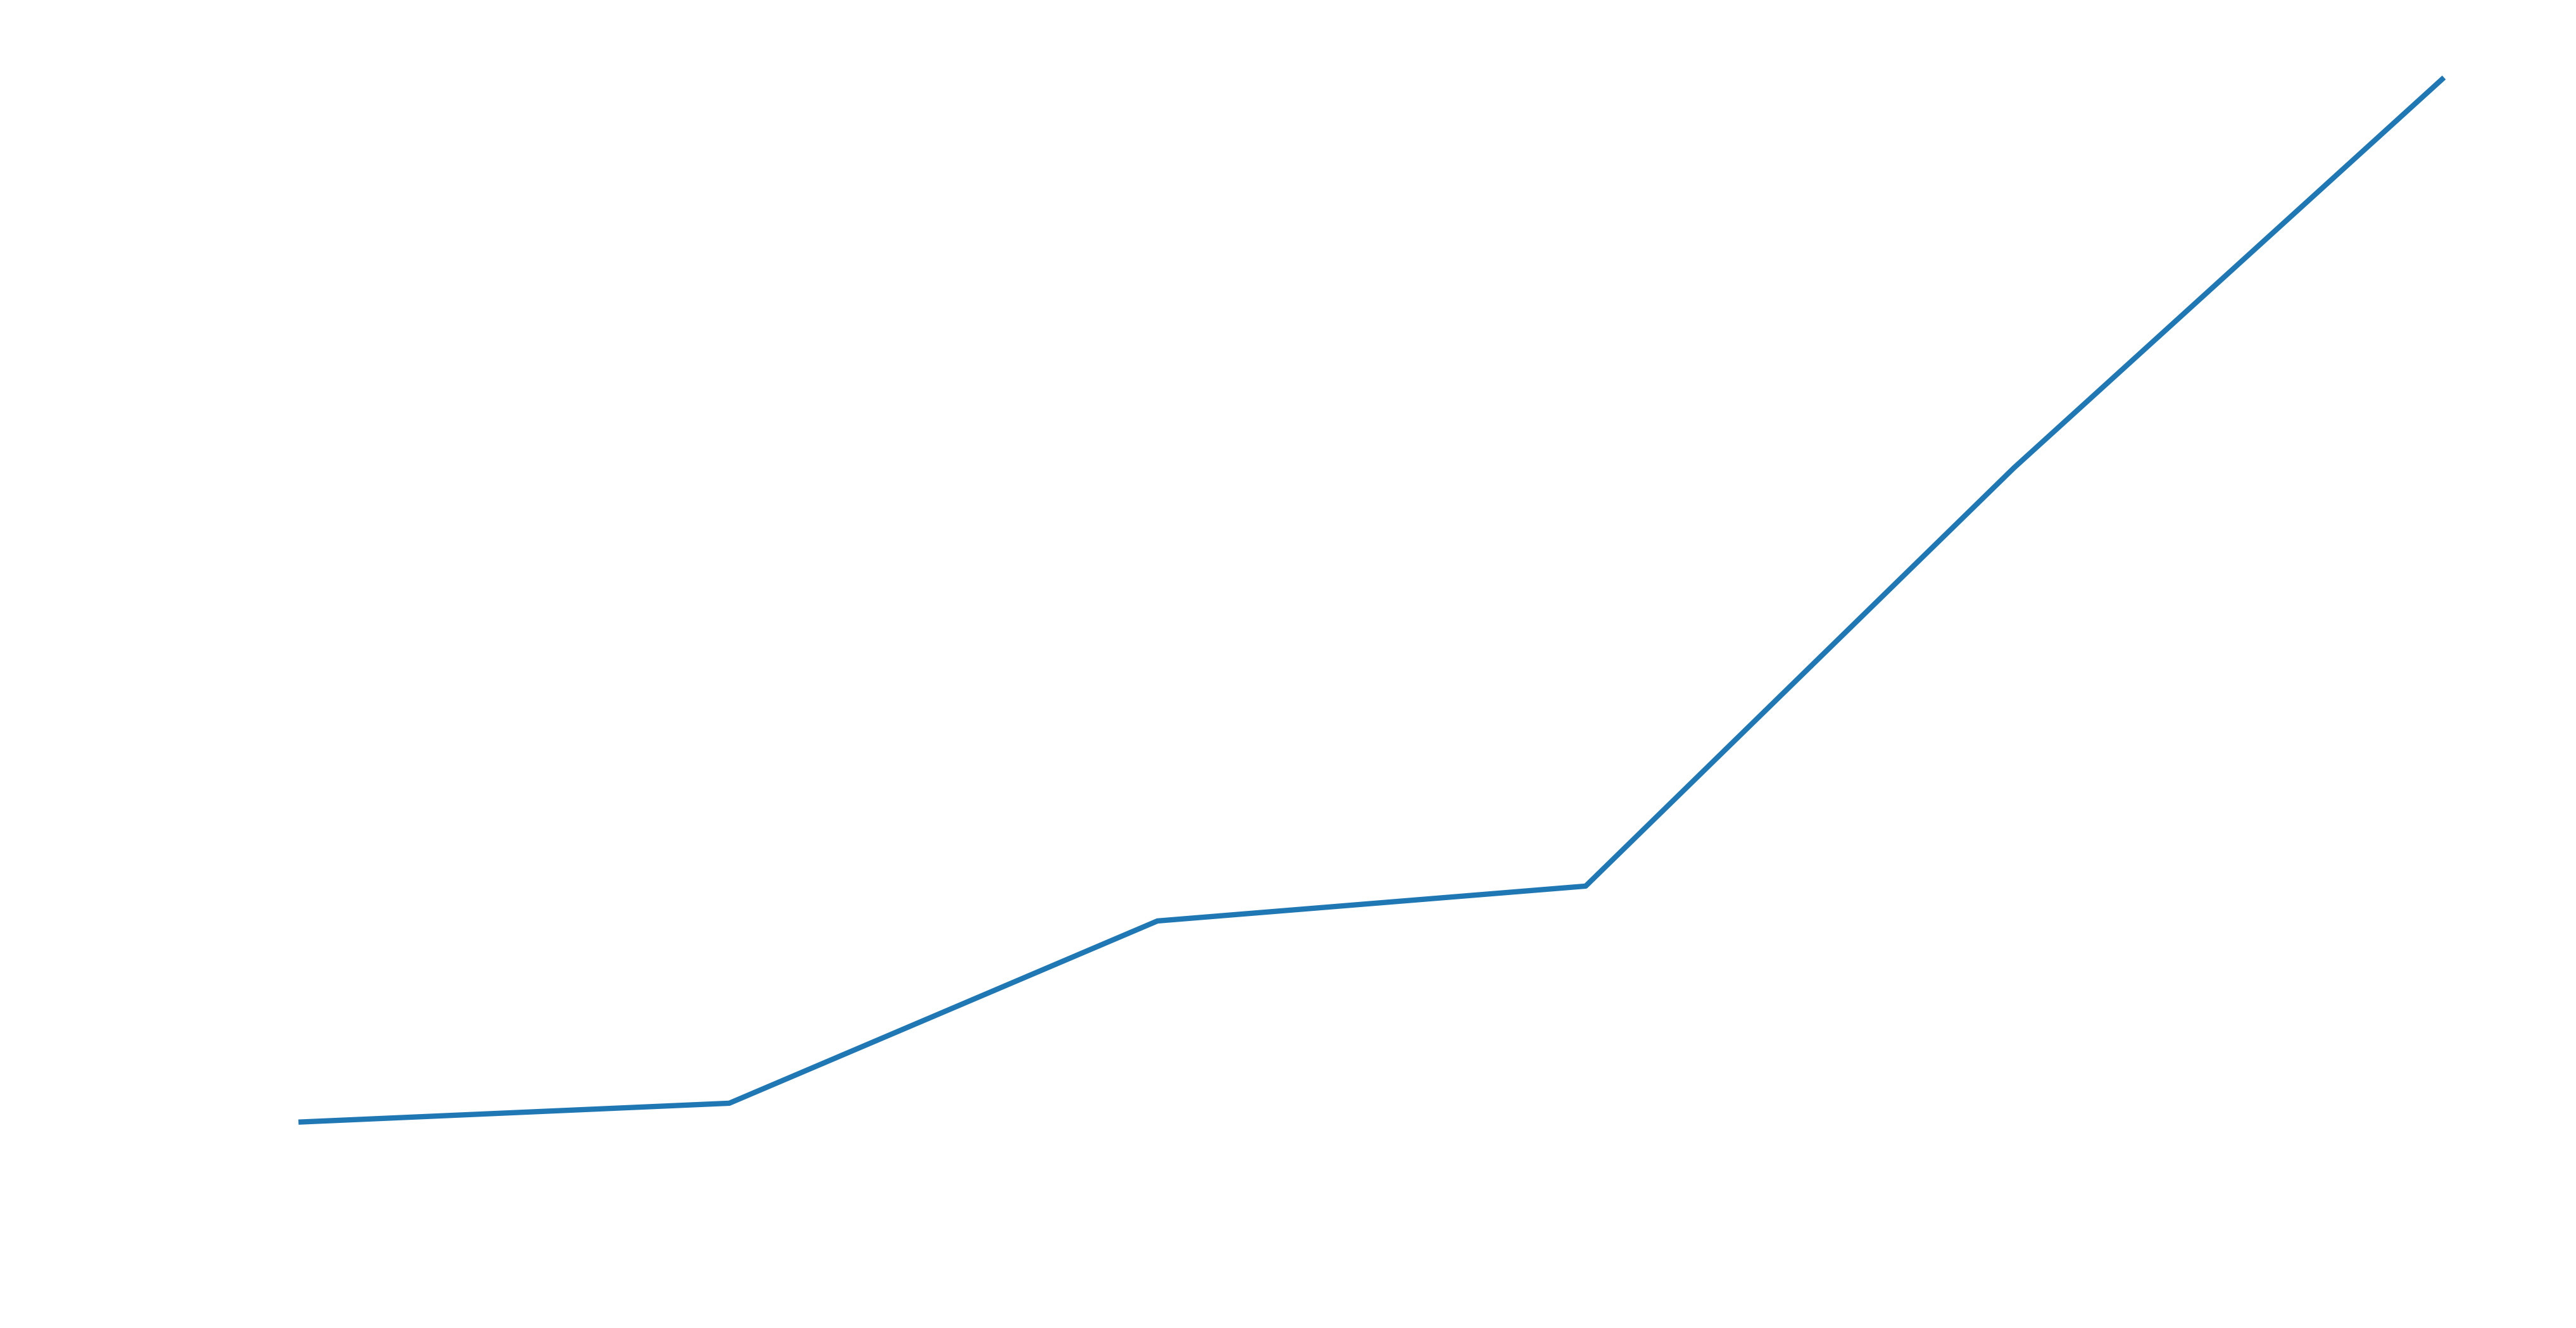

In [42]:
plt.figure(figsize=(12, 6))
x=np.array(['easy use','would recommend','year old','great price','good quality','well made'])
y=np.array([590,597,665,678,834,979])
plt.plot(x,y)
plt.xlabel('Top 6 important words for high rating')
plt.ylabel('Frequency')
plt.show()

In [43]:
x_2014=np.array(['easy use','would recommend','year old','great price','good quality','well made'])
y_2014=np.array([810,1057,392,568,720,1367])

Text(0,0.5,'Frequency')

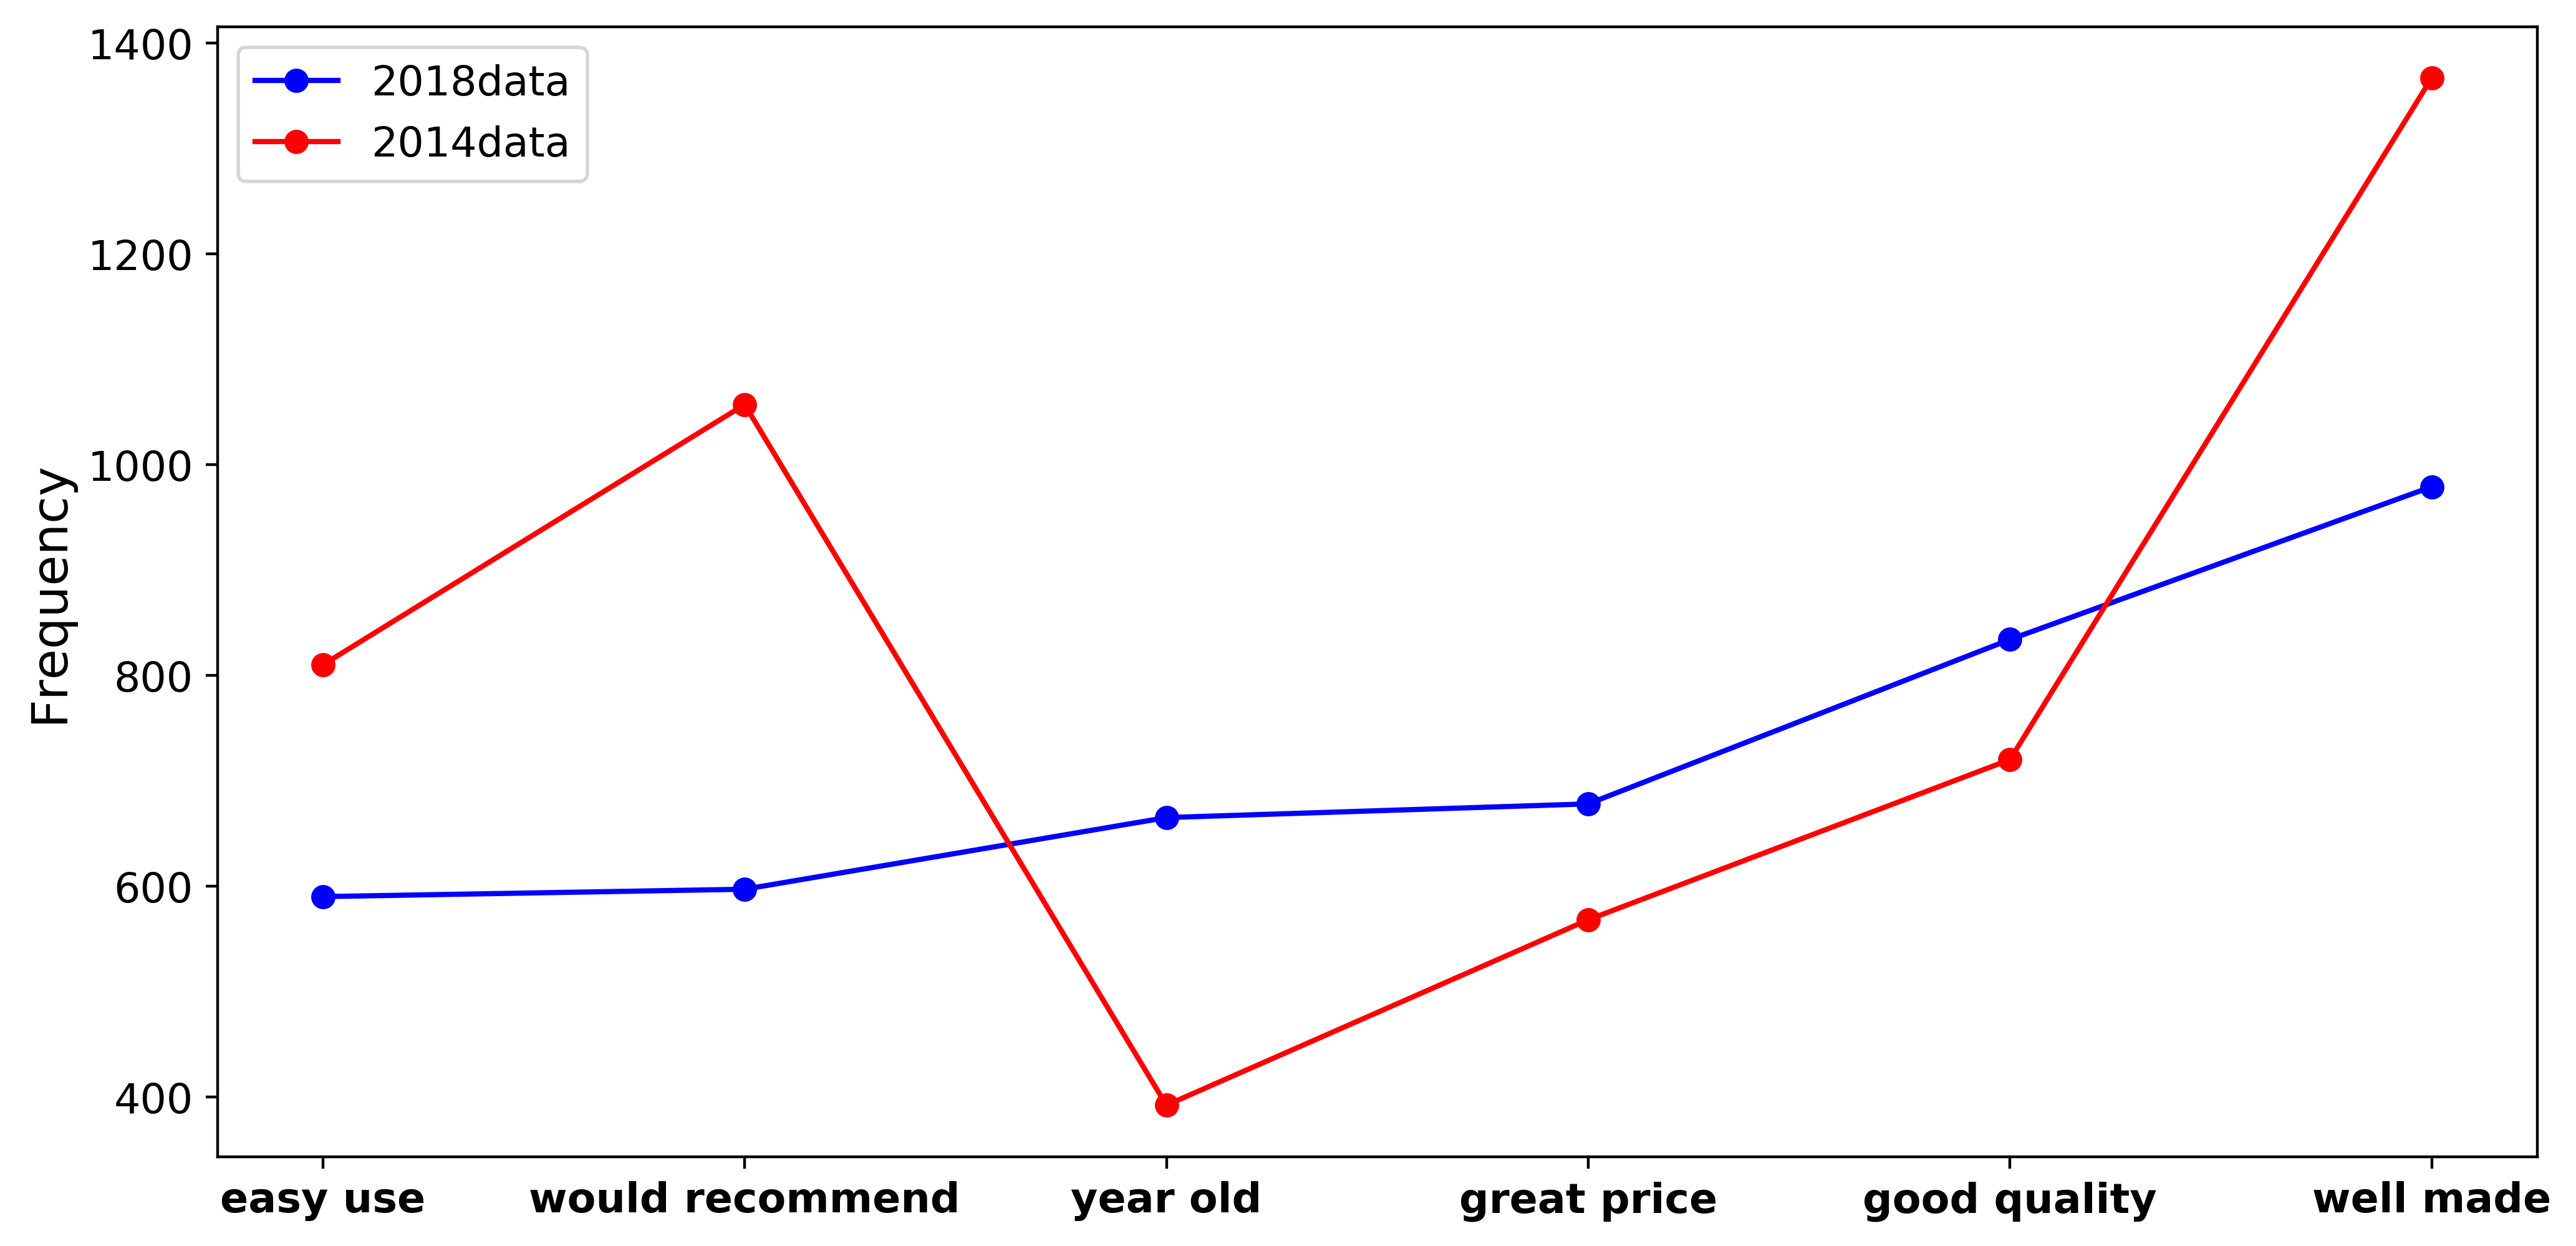

In [45]:
from matplotlib.pylab import subplots
matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['figure.dpi'] = 400
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['xtick.color'] = 'black'
matplotlib.rcParams['ytick.color'] = 'black'
fig = plt.figure(figsize=(12, 6))
fig.patch.set_alpha(0);
ax = fig.add_subplot(111)
ax.patch.set_alpha(0);
plt.xticks(weight = 'bold')
ax.plot(x,y,'b-o',x_2014,y_2014,'r-o')
ax.legend(('2018data','2014data'),loc='best')
plt.xlabel('')
plt.ylabel('Frequency')

In [1]:
import json
import numpy as np
from collections import defaultdict, Counter
import string
from sklearn import linear_model
import sys
import nltk
from nltk.corpus import stopwords 

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alook\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import spacy

In [4]:
f_name = "Prime_Pantry.json"
all_data = []
with open(f_name, 'r') as f:
    line = f.readline()
    #print(line)
    while line:
        data = json.loads(line)
        all_data.append(data)
        line = f.readline()

In [5]:
print(len(all_data))

471614


In [5]:
for i in all_data:
    if 'reviewText' not in i.keys() or 'overall' not in i.keys() or not i['reviewText'] or not i['overall']:
        all_data.remove(i)

In [7]:
print(len(all_data))

471233


In [6]:
def only_adj_and_noun(all_data):
    bigramCount = defaultdict(int)
    uniCount = defaultdict(int)
    punctuation = set(string.punctuation)
    stop_words = set(stopwords.words('english'))
    translator = str.maketrans('', '', string.punctuation)

    review_text = []
    for d in all_data:
        #r = ''.join([c for c in d['reviewText'].lower() if not c in discard_set])
        r = d['reviewText'].translate(translator).lower()
        r = [word for word in r.split() if word not in stop_words and not word.isdigit()]
        review_text.append(" ".join(r))
        if r:
            prev = r[0]
            for i in range(1, len(r)):
                bigram = prev + " " + r[i]
                uniCount[r[i]] += 1
                bigramCount[bigram] += 1
                prev = r[i]
            uniCount[r[0]] += 1
    return uniCount, bigramCount, review_text

In [7]:
uni_count, bi_count, review_text = only_adj_and_noun(all_data)

In [10]:
print(len(bi_count), len(uni_count))

1861760 91559


In [8]:
def feature(text, bigrams, bigramId):
    feat = [0]*len(bigrams)
    words = text.split()
    for i in range(len(words)-1):
        bigram = words[i] + " " + words[i+1]
        try:
            feat[bigramId[bigram]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [9]:
countsBigram = [(bi_count[d], d) for d in bi_count.keys()]
countsBigram.sort()
countsBigram.reverse()

In [10]:
bigrams = [c[1] for c in countsBigram[:100]]
bigramId = dict(zip(bigrams, range(len(bigrams))))
bigramSet = set(bigrams)

In [11]:
print(review_text[1])

fantastic buy good plastic wrap even though labeled cling plus feel another plastic wrap holds clings tighter still price roll size ill order product needed amazon prime food orders


In [12]:
X_2 = []
for i in range(len(all_data)):
    X_2.append(feature(review_text[i], bigrams, bigramId))
y_2 = [d['overall'] for d in all_data]

In [13]:
reg = 1.0
clf_bi = linear_model.Ridge(reg, fit_intercept=False)
clf_bi.fit(X_2, y_2)
theta_bi = clf_bi.coef_
pred_bi = clf_bi.predict(X_2)

In [58]:
max_index = np.argsort(theta_bi)[-100:][::-1]
max_index = max_index[1:]
print(max_index)
print(len(theta_bi[max_index]))
#print(np.array(bigrams)[max_index - 1])
tmp_bigram = np.array(bigrams)[max_index]
print(tmp_bigram)
tmp_pair = {bigrams[i]: theta_bi[i] for i in max_index}

[58 32 11 66 98 87 71  0 76 95  1 54 31  4 18 69 37 13 43 49 77 35 88 47
 17 55 83  3 74 36 28 92 93  7 15  5 46 51  2 42 33 48 38 25 70 61 19 56
  9 44 22 72 84 63 60 94 67 89 27  6 53 73 90 14 20 65  8 39 91 68 52 81
 86 50 30 40 29 62 34 79 23 85 24 59 99 12 41 82 96 64 80 21 10 75 45 16
 26 57 97]
99
['excellent product' 'love stuff' 'highly recommend' 'great snack'
 'love tea' 'great buy' 'go wrong' 'great product' 'one best' 'cant beat'
 'great price' 'great tasting' 'great value' 'works great' 'tastes great'
 'one favorite' 'great flavor' 'great taste' 'kids love' 'hard find'
 'love taste' 'good stuff' 'absolutely love' 'great deal' 'love product'
 'love smell' 'fast shipping' 'good price' 'work great' 'easy use'
 'smells great' 'easy make' 'really well' 'really good' 'taste great'
 'works well' 'love love' 'good value' 'good product' 'good quality'
 'every day' 'smells good' 'tastes good' 'long time' 'ive using'
 'good deal' 'ive tried' 'dry skin' 'really like' 'year old' 'glut

#######################

In [18]:
countsUnigram = [(uni_count[w], w) for w in uni_count]
countsUnigram.sort()
countsUnigram.reverse()

In [19]:
unigrams = [x[1] for x in countsUnigram[:100]]
unigramId = dict(zip(unigrams, range(len(unigrams))))
unigramSet = set(unigrams)

In [20]:
def feature_2(text, unigrams, unigramId):
    feat = [0]*len(unigrams)
    words = text.split()
    for i in words:
        #bigram = words[i] + " " + words[i+1]
        try:
            feat[unigramId[i]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [21]:
def feature_3(text):
    feat = [0]*len(combineds)
    words = text.split()
    for i in range(len(words)-1):
        bigram = words[i] + " " + words[i+1]
        try:
            feat[combinedId[bigram]] += 1
        except KeyError:
            continue
    for w in words:
        try:
            feat[combinedId[w]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [22]:
X_uni = []
for i in range(len(all_data)):
    X_uni.append(feature_2(review_text[i], unigrams, unigramId))
y_uni = [d['overall'] for d in all_data]

In [23]:
print(len(X_uni), len(y_uni))

471233 471233


In [24]:
reg = 1.0
clf_uni = linear_model.Ridge()
clf_uni.fit(X_uni, y_uni)
theta_uni = clf_uni.coef_
pred_uni = clf_uni.predict(X_uni)

In [25]:
max_index = np.argsort(theta_uni)[-200:][::-1]
print(len(theta_uni[max_index]))
#print(np.array(bigrams)[max_index - 1])
tmp_uni = np.array(unigrams)[max_index - 1]
print(tmp_uni)
count_pair = [(i, uni_count[i]) for i in tmp_uni]
print(count_pair)

101
['say' 'always' 'time' 'right' 'brand' 'make' 'like' 'im' 'lot' 'used'
 'even' 'great' 'perfect' 'dry' 'never' 'store' 'try' 'every' 'excellent'
 'hair' 'could' 'know' 'doesnt' 'go' 'dont' 'tasty' 'day' 'bit' 'first'
 'free' 'work' 'product' 'smells' 'bag' 'feel' 'really' 'one' 'sugar'
 'need' 'coffee' 'best' 'also' 'much' 'delicious' 'keep' 'using' 'water'
 'works' 'right' 'ive' 'smell' 'stuff' 'got' 'size' 'sweet' 'find' 'didnt'
 'bought' 'amazon' 'little' 'since' 'well' 'nice' 'order' 'buy' 'teeth'
 'still' 'clean' 'many' 'recommend' 'better' 'long' 'products' 'scent'
 'taste' 'good' 'years' 'love' 'snack' 'would' 'eat' 'made' 'box' 'makes'
 'cant' 'easy' 'ever' 'price' 'without' 'favorite' 'tried' 'quality'
 'flavor' 'tastes' 'think' 'get' 'tea' 'way' 'use' 'skin' 'fresh']
[('say', 9507), ('always', 16310), ('time', 26043), ('right', 9419), ('brand', 13583), ('make', 17531), ('like', 75923), ('im', 20349), ('lot', 10709), ('used', 22539), ('even', 17254), ('great', 102709), ('p

##### get low ratting data ####

In [17]:
def data_by_rating(all_data, rating):
    ratings_data = []
    for d in all_data:
        if d['overall'] == rating:
            ratings_data.append(d)
    #print(len(ratings_data))
    return ratings_data

low_ratings = data_by_rating(all_data, 1.0)
#reviewText_low = [''.join([c for c in datum['reviewText'].lower() if not c in punctuation]) for datum in low_ratings]

In [18]:
low_uni_count, low_bi_count, low_reviews = only_adj_and_noun(low_ratings)

In [19]:
low_uni_count, low_bi_count = Counter(low_uni_count), Counter(low_bi_count)

In [20]:
print(low_uni_count.most_common(50))

[('like', 8026), ('product', 5946), ('taste', 4629), ('one', 4310), ('would', 3461), ('dont', 3257), ('buy', 3084), ('box', 2979), ('good', 2975), ('even', 2581), ('use', 2525), ('get', 2517), ('used', 2275), ('bad', 2113), ('flavor', 2091), ('didnt', 2069), ('time', 2032), ('really', 2014), ('smell', 1991), ('never', 1987), ('im', 1972), ('much', 1870), ('bought', 1851), ('ive', 1588), ('got', 1572), ('tried', 1545), ('away', 1534), ('money', 1525), ('water', 1523), ('disappointed', 1495), ('coffee', 1492), ('first', 1487), ('using', 1462), ('work', 1452), ('tastes', 1443), ('made', 1423), ('could', 1420), ('bag', 1409), ('love', 1403), ('amazon', 1386), ('better', 1372), ('well', 1336), ('doesnt', 1322), ('way', 1314), ('thought', 1298), ('try', 1283), ('horrible', 1278), ('also', 1277), ('know', 1271), ('tasted', 1264)]


In [21]:
print(low_bi_count.most_common(50))

[('waste money', 750), ('taste like', 714), ('tastes like', 620), ('dont know', 496), ('never buy', 409), ('tasted like', 321), ('expiration date', 318), ('prime pantry', 298), ('dont like', 294), ('first time', 290), ('didnt like', 280), ('dont buy', 267), ('smells like', 267), ('paper towels', 262), ('taste good', 259), ('thought would', 259), ('threw away', 257), ('would recommend', 253), ('im sure', 252), ('ive ever', 248), ('nothing like', 246), ('throw away', 236), ('dont waste', 230), ('wont buy', 229), ('grocery store', 228), ('much better', 220), ('peanut butter', 214), ('doesnt work', 210), ('smell like', 205), ('one star', 195), ('like taste', 195), ('corn syrup', 194), ('even though', 185), ('would buy', 179), ('every time', 176), ('pantry box', 174), ('didnt work', 170), ('looks like', 163), ('would never', 161), ('ive used', 158), ('gluten free', 156), ('buy product', 156), ('feel like', 155), ('ive tried', 148), ('really bad', 141), ('palm oil', 140), ('dont think', 138)

In [22]:
import matplotlib
matplotlib.rcParams['font.size'] = 14.0
matplotlib.rcParams['figure.dpi'] = 400
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['xtick.color'] = 'black'
matplotlib.rcParams['ytick.color'] = 'black'

[('waste money', 750), ('taste like', 714), ('tastes like', 620), ('dont know', 496), ('never buy', 409), ('tasted like', 321), ('expiration date', 318), ('prime pantry', 298), ('dont like', 294), ('first time', 290), ('didnt like', 280), ('dont buy', 267), ('smells like', 267), ('paper towels', 262), ('taste good', 259)]
['waste money', 'taste like', 'dont know', 'never buy', 'expiration date']


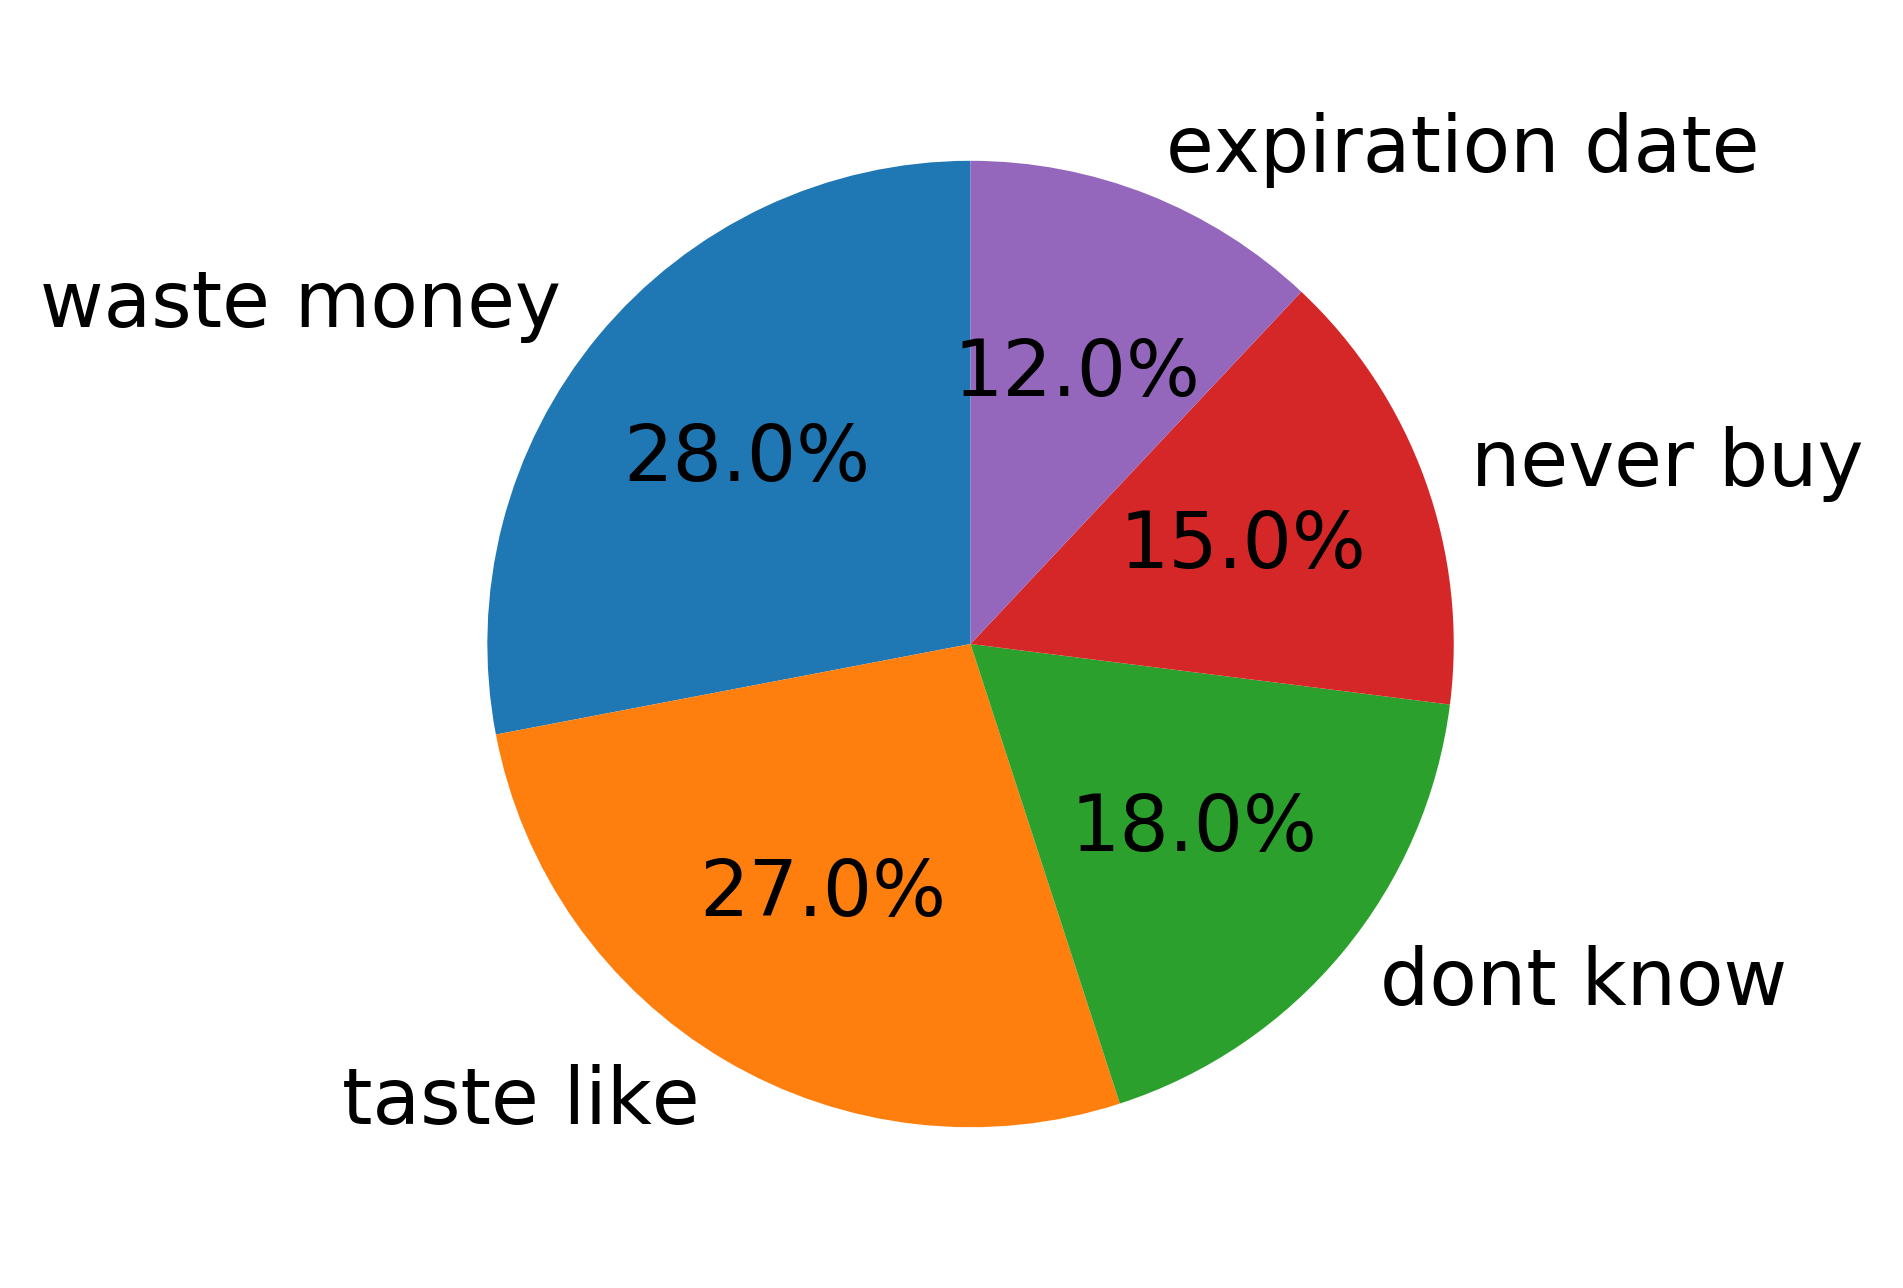

In [46]:
# top 5 1 star words
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
import numpy as np
import math
mostcommon = low_bi_count.most_common(15)
print(mostcommon)
selected_list = [mostcommon[i][0] for i in [0,1,3,4,6]];
print(selected_list)


labels = [mostcommon[i][0] for i in [0,1,3,4,6]]
relfreq = [round(i/sum(freq)*100) for i in freq]
relfreq 
fig1, ax1 = plt.subplots();
fig1.patch.set_alpha(1)
ax1.patch.set_alpha(1);
ax1.pie(relfreq, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90);

In [ ]:
freq = [mostcommon[i][1] for i in [0,1,3,4,6]]
fig = plt.figure(figsize=(12, 6))
fig.patch.set_alpha(1);
ax = fig.add_subplot(111)
ax.patch.set_alpha(1);
plt.bar(selected_list,freq)
plt.xticks(weight = 'bold')
plt.ylabel('Frequency',weight = 'bold');

In [26]:
high_ratings = data_by_rating(all_data, 5.0)
high_uni_count, high_bi_count, high_reviews = only_adj_and_noun(high_ratings)
high_uni_count, high_bi_count = Counter(high_uni_count), Counter(high_bi_count)

In [27]:
print(high_uni_count.most_common(50))

[('great', 86878), ('good', 63507), ('love', 62214), ('product', 41136), ('like', 40867), ('use', 30102), ('one', 24713), ('price', 24568), ('taste', 23420), ('best', 22067), ('really', 21667), ('well', 19695), ('flavor', 19036), ('get', 18040), ('time', 17517), ('works', 16936), ('buy', 16835), ('dont', 16051), ('much', 15211), ('favorite', 14988), ('delicious', 14285), ('used', 14066), ('would', 13731), ('nice', 13648), ('better', 13567), ('tea', 13331), ('ive', 13253), ('always', 13160), ('little', 12404), ('also', 12339), ('perfect', 12030), ('coffee', 11975), ('im', 11806), ('make', 11626), ('using', 11619), ('stuff', 11422), ('skin', 11271), ('easy', 10407), ('find', 10279), ('even', 10227), ('smell', 10163), ('amazon', 10148), ('tried', 9990), ('clean', 9940), ('fresh', 9853), ('day', 9847), ('go', 9794), ('hair', 9384), ('years', 9156), ('snack', 9054)]


In [28]:
print(high_bi_count.most_common(50))

[('great product', 9171), ('great price', 6682), ('works great', 4417), ('good price', 4184), ('good product', 3802), ('works well', 3546), ('highly recommend', 3163), ('really good', 2989), ('great taste', 2846), ('prime pantry', 2761), ('much better', 2552), ('love product', 2539), ('tastes great', 2513), ('taste great', 2479), ('really like', 2341), ('ive tried', 2149), ('love stuff', 2088), ('peanut butter', 2059), ('gluten free', 2049), ('smells great', 2047), ('great value', 2005), ('long time', 1985), ('grocery store', 1980), ('great flavor', 1848), ('sensitive skin', 1817), ('taste good', 1780), ('love love', 1774), ('kids love', 1718), ('easy use', 1699), ('every day', 1692), ('good stuff', 1687), ('taste like', 1676), ('first time', 1614), ('hard find', 1601), ('great deal', 1589), ('would recommend', 1544), ('excellent product', 1493), ('good quality', 1481), ('tastes good', 1469), ('year old', 1445), ('tastes like', 1441), ('ive used', 1432), ('product great', 1413), ('grea

In [68]:
from matplotlib.pylab import subplots
fig,ax=subplots(figsize=(12, 6))
x = 
ax.plot(x,y,'g-o')
# ,x_2014,y_2014,'r-o'
#ax.legend(('2018 data','2014 data'),loc='best')
plt.xlabel('Frequency differnt of Top 6 important words of high rating')
plt.ylabel('Frequency')

SyntaxError: invalid syntax (<ipython-input-68-19784bc819ae>, line 3)

['excellent product', 'love stuff', 'highly recommend', 'great snack', 'love tea', 'great buy', 'cant beat', 'great price', 'great tasting', 'love smell']
[0.576032391159951, 0.5330019275164578, 0.5240829914065355, 0.5007033944959333, 0.48576012299016536, 0.48511065277060716, 0.4782794538813865, 0.47811171018359055, 0.47420558550358416, 0.3850982069950153]


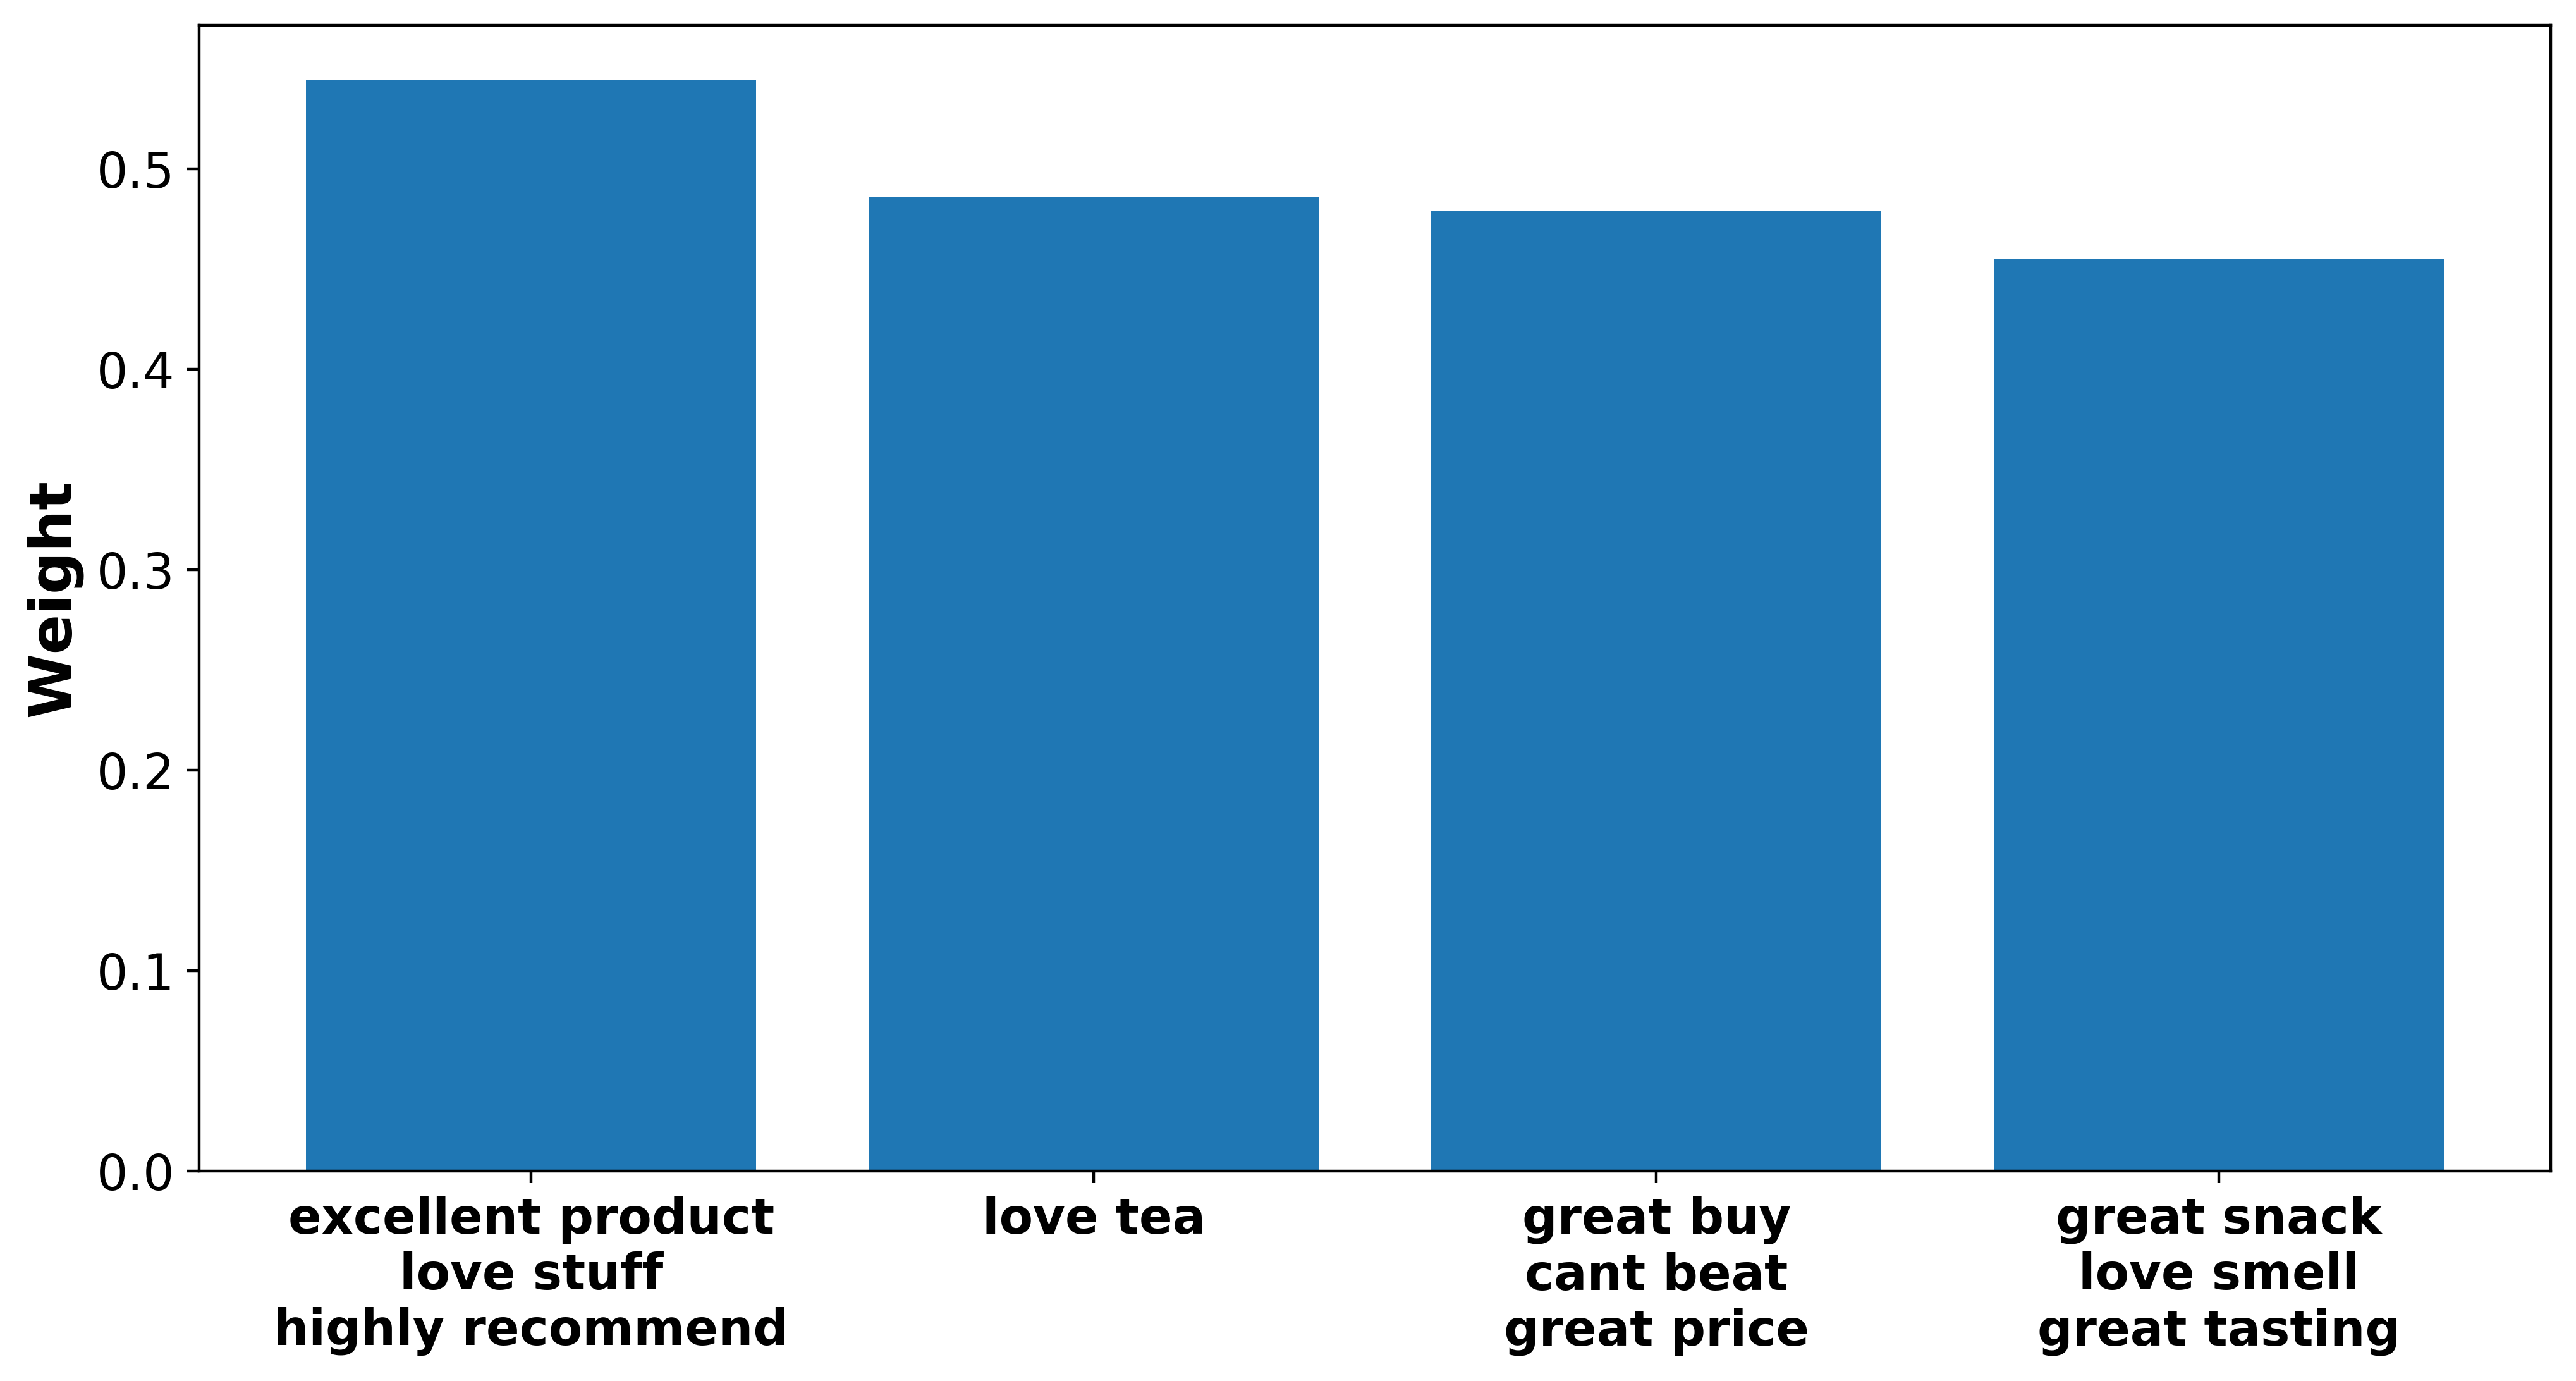

In [67]:
# top 10 important words plot
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
import numpy as np
from statistics import mean
selected_list = ['excellent product','love stuff','highly recommend','great snack','love tea','great buy','love smell','cant beat','great price','great tasting'];
selected_list.sort(key=lambda x: abs(tmp_pair[x]), reverse=True)
print(selected_list)
coef = [abs(tmp_pair[i]) for i in selected_list]
print(coef)
selected_list = ['excellent product\nlove stuff\nhighly recommend','love tea','great buy\ncant beat\ngreat price','great snack\nlove smell\ngreat tasting'];
coef = [mean(coef[0:3]),coef[4],mean([coef[5],coef[7],coef[8]]),mean([coef[3],coef[6],coef[9]])]
fig = plt.figure(figsize=(12, 6))
fig.patch.set_alpha(1);
ax = fig.add_subplot(111)
ax.patch.set_alpha(1);
plt.bar(selected_list,coef)
plt.xticks(weight = 'bold')
plt.ylabel('Weight',weight = 'bold');


In [62]:
print(pred_bi)

[4.29234101 3.86016096 4.29234101 ... 5.13296944 4.29234101 4.73122446]


In [32]:
[1,2,3,45,5]

[1, 2, 3, 45, 5]

In [33]:
[i/2 for i in _]

[0.5, 1.0, 1.5, 22.5, 2.5]

In [53]:
coef[0:3]

[0.576032391159951, 0.5330019275164578, 0.5240829914065355]